In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Część 1 - obróbka danych

#### 1.1. Wczytanie danych

In [2]:
df = pd.read_csv('loan_data.csv', low_memory=False)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501        NaN     5000.0       5000.0           4975.0   36 months   
1  1077430        NaN     2500.0       2500.0           2500.0   60 months   
2  1077175        NaN     2400.0       2400.0           2400.0   36 months   
3  1076863        NaN    10000.0      10000.0          10000.0   36 months   
4  1075358        NaN     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0   10.65%       162.87     B        B2  ...                            NaN   
1   15.27%        59.83     C        C4  ...                            NaN   
2   15.96%        84.33     C        C5  ...                            NaN   
3   13.49%       339.31     C        C1  ...                            NaN   
4   12.69%        67.79     B        B5  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  
3               NaN                   NaN             NaN  
4               NaN                   NaN             NaN  

[5 rows x 151 columns]

In [3]:
# podstawowe informacje
print('Rozmiar (wiersze x kolumny): ', df.shape)
print('Podstawowe informacje statystyczne: ', df.describe())
print('\nTypy danych przechowywane w kolumnach: ', df.dtypes.values)
print('\nEtykiety kolumn: ', df.columns.values)

Rozmiar (wiersze x kolumny):  (42536, 151)
Podstawowe informacje statystyczne:         member_id     loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count        0.0  42535.000000  42535.000000     42535.000000  42535.000000   
mean         NaN  11089.722581  10821.585753     10139.938785    322.623063   
std          NaN   7410.938391   7146.914675      7131.598014    208.927216   
min          NaN    500.000000    500.000000         0.000000     15.670000   
25%          NaN   5200.000000   5000.000000      4950.000000    165.520000   
50%          NaN   9700.000000   9600.000000      8500.000000    277.690000   
75%          NaN  15000.000000  15000.000000     14000.000000    428.180000   
max          NaN  35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti   delinq_2yrs  fico_range_low  \
count  4.253100e+04  42535.000000  42506.000000    42535.000000   
mean   6.913656e+04     13.373043      0.152449      713.052545   
std    

#### 1.2. Usunięcie kolumn które zawierają informacje z przyszłości

In [4]:
df.drop(['issue_d', 'last_pymnt_amnt', 'last_pymnt_d', 'next_pymnt_d', 'pymnt_plan', 
          'mths_since_last_delinq', 'mths_since_last_record', 'total_pymnt', 'recoveries',
        'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp',
        'fico_range_low', 'fico_range_high'], axis=1, inplace=True)
print('Liczba kolumn pozostała po opercji: ',df.shape[1])

Liczba kolumn pozostała po opercji:  136


#### 1.3 Usunięcie kolumn ze zbędnymi informacjami

In [5]:
#sprawdzono, czy kolumny zawierają zduplikowane dane 
#wniosek: istnieją różnice pomiędzy kolumnami
#na tym etapie nie usunięto jednej z kolumn

check = df['loan_amnt'] == df['funded_amnt']
print(False in check.values)

True


In [6]:
#usuwanie kolumn, które zawierają więcej niż 70% pustych wartości (wartość współczynnika pozostaje modyfikowalna)
def tidy_empty(df, boundary=0.7):
    #obliczanie procentu pustych wartości w kolumnach
    percent_nan = df.isnull().sum() / len(df)

    #wybór kolumn, które mają mniej niż percent_nan procent pustych wartości
    selected = percent_nan[percent_nan <= boundary].index

    #tworzenie nowego DataFrame zawierającego tylko wybrane kolumny
    dat = df[selected]

    return dat


#zaimplenetowanie funkcji
dat = tidy_empty(df, boundary=0.7)

# Wyświetlenie wynikowego DataFrame
print('Liczba kolumn pozostała po opercji: ',dat.shape[1])
print(dat.columns)

Liczba kolumn pozostała po opercji:  48
Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collection_recovery_fee', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [7]:
#usunieto kolumny zawierajace zbędne informacje
dat = dat.drop(['id', 'url', 'last_credit_pull_d', 'pub_rec_bankruptcies', 'emp_title', 'title',
          'zip_code', 'collection_recovery_fee', 'earliest_cr_line', 'funded_amnt',
          'funded_amnt_inv', 'tax_liens', 'delinq_amnt', 'purpose'], axis=1)
print('Liczba kolumn pozostała po opercji: ',dat.shape[1])

Liczba kolumn pozostała po opercji:  34


#### 1.4. Usunięcie kolumn z tylko jedną unikalną wartością

In [8]:
#funkcja automatyzująca usuwanie kolumn z tylko jedną unikalną wartością
def not_unique(df):
    #sprawdzenie liczby unikalnych wartości dla każdej kolumny
    unique = df.nunique()

    #wybór kolumn, które mają więcej niż jedną unikalną wartość
    sel_col = unique[unique > 1].index

    #tworzenie nowego DataFrame zawierającego tylko wybrane kolumny
    x = df[sel_col]

    return x

#zaimplentowanie funkcji
dat = not_unique(dat)

print('Liczba kolumn pozostała po opercji: ',dat.shape[1])

Liczba kolumn pozostała po opercji:  25


#### 1.6. Przekształcenie wartości w kolumnach - usunięcie procentów, dodatkowych znaków, itd

In [9]:
#usuniecie znaku '%' z kolumny int_rate 
dat.head()
x = dat['int_rate'].str[:-1]
x.values

#utworzone obiekty typu 'string' posiadaja biały znak z lewej strony
x = x.str.lstrip()

#zamiana zmiennych typu string na float
x = x.values.astype('float64')

#przypisanie serii danych float do oryginalnej kolumny int_rate
dat['int_rate'] = x
dat.head()

loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0     5000.0   36 months     10.65       162.87     B        B2  10+ years   
1     2500.0   60 months     15.27        59.83     C        C4   < 1 year   
2     2400.0   36 months     15.96        84.33     C        C5  10+ years   
3    10000.0   36 months     13.49       339.31     C        C1  10+ years   
4     3000.0   60 months     12.69        67.79     B        B5     1 year   

  home_ownership  annual_inc verification_status  ... inq_last_6mths open_acc  \
0           RENT     24000.0            Verified  ...            1.0      3.0   
1           RENT     30000.0     Source Verified  ...            5.0      3.0   
2           RENT     12252.0        Not Verified  ...            2.0      2.0   
3           RENT     49200.0     Source Verified  ...            1.0     10.0   
4           RENT     80000.0     Source Verified  ...            0.0     15.0   

  pub_rec  revol_bal  revol_util  total_acc  last_fico_range_high  \
0     0.0    13648.0       83.7%        9.0                 739.0   
1     0.0     1687.0        9.4%        4.0                 499.0   
2     0.0     2956.0       98.5%       10.0                 739.0   
3     0.0     5598.0         21%       37.0                 604.0   
4     0.0    27783.0       53.9%       38.0                 684.0   

   last_fico_range_low  acc_now_delinq debt_settlement_flag  
0                735.0             0.0                    N  
1                  0.0             0.0                    N  
2                735.0             0.0                    N  
3                600.0             0.0                    N  
4                680.0             0.0                    N  

[5 rows x 25 columns]

In [10]:
#usuniecie słowa 'months' z kolumny 'term' i konwersja na float64
dat.term = dat.term.str.split().str.get(0)
dat.term = dat.term.astype('float64')
print(dat.term.dtypes)

float64


In [11]:
#przekształcenie kolumny 'emp_length'
x = dat.emp_length.unique()
print('Wejsciowe, unikalne wartosci w kolumnie emp_length:')
print(x)

#przeanalizowano występujące wartości- grupa '10+' jako najwyższa zostanie zamieniona na '10', a '< 1' na '0'
dat['emp_length'] = dat.emp_length.str.split('+').str.get(0)

def conv(arg):
    return '0' if arg == '< 1 year' else arg

dat['emp_length'] = dat.apply(lambda x: conv(x['emp_length']), axis=1)

dat.emp_length = dat.emp_length.str.split().str.get(0)

dat.emp_length = dat.emp_length.astype('float64')

print('\nPo modyfikacji:')
print(dat.emp_length.unique())
print(dat.emp_length.dtype)

Wejsciowe, unikalne wartosci w kolumnie emp_length:
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

Po modyfikacji:
[10.  0.  1.  3.  8.  9.  4.  5.  6.  2.  7. nan]
float64


In [12]:
#usuniecie znaku '%' z kolumny revol_util
dat.head()
x = dat['revol_util'].str[:-1]
x.values

#zamiana zmiennych typu string na float
x = x.values.astype('float64')

#przypisanie serii danych float do oryginalnej kolumny int_rate
dat['revol_util'] = x
print(dat.revol_util.head())

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64


In [13]:
#przeglad wpisów z kolumny loan_status
dat.loan_status.unique()

array(['Fully Paid', 'Charged Off', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [14]:
#utworzenie funkcji usuwającej zbędny komentarz 'Does not meet the credit...'
def tidy(arg):
    if arg == 'Does not meet the credit policy. Status:Fully Paid':
        return 'Fully Paid'
    elif arg == 'Does not meet the credit policy. Status:Charged Off':
        return 'Charged Off'
    else:
        return arg
    
#zaimplementowanie funkcji na data series
dat.loan_status = dat.apply(lambda x: tidy(x['loan_status']), axis=1)
dat.loan_status.unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [15]:
#przegląd wartości kolumny 'verification_status'
print('Było: ', dat['verification_status'].unique())

#funckja porządkująca wpisy - source verified --> verified
def tidy(x):
    return 'Verified' if x == 'Source Verified' else x

dat.verification_status = dat.apply(lambda x: tidy(x['verification_status']), axis=1)
print('Jest: ', dat.verification_status.unique())

Było:  ['Verified' 'Source Verified' 'Not Verified' nan]
Jest:  ['Verified' 'Not Verified' nan]


In [16]:
#przegląd wartości kolumny 'debt_settlement_flag'
print(dat.debt_settlement_flag.unique())

#zamiana wpisów 'N'/'Y' na '0'/'1' za pomoca zaimplementowania funckji

def make_dummies(x):
    return 1 if x == 'Y' else 0

dat.debt_settlement_flag = dat.apply(lambda x: make_dummies(x['debt_settlement_flag']), axis=1)

['N' 'Y' nan]


In [17]:
#przekształcenie wpisów z kolumny loan_status w warości zerojedynkowe na potrzeby analizy korelacji w części 2 projektu
print(dat.loan_status.unique())
dat = pd.get_dummies(dat, columns=['loan_status'], prefix='loan_sts', prefix_sep='=', drop_first=True)
dat.head(10)

['Fully Paid' 'Charged Off' nan]


loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0     5000.0  36.0     10.65       162.87     B        B2        10.0   
1     2500.0  60.0     15.27        59.83     C        C4         0.0   
2     2400.0  36.0     15.96        84.33     C        C5        10.0   
3    10000.0  36.0     13.49       339.31     C        C1        10.0   
4     3000.0  60.0     12.69        67.79     B        B5         1.0   
5     5000.0  36.0      7.90       156.46     A        A4         3.0   
6     7000.0  60.0     15.96       170.08     C        C5         8.0   
7     3000.0  36.0     18.64       109.43     E        E1         9.0   
8     5600.0  60.0     21.28       152.39     F        F2         4.0   
9     5375.0  60.0     12.69       121.45     B        B5         0.0   

  home_ownership  annual_inc verification_status  ... open_acc pub_rec  \
0           RENT     24000.0            Verified  ...      3.0     0.0   
1           RENT     30000.0            Verified  ...      3.0     0.0   
2           RENT     12252.0        Not Verified  ...      2.0     0.0   
3           RENT     49200.0            Verified  ...     10.0     0.0   
4           RENT     80000.0            Verified  ...     15.0     0.0   
5           RENT     36000.0            Verified  ...      9.0     0.0   
6           RENT     47004.0        Not Verified  ...      7.0     0.0   
7           RENT     48000.0            Verified  ...      4.0     0.0   
8            OWN     40000.0            Verified  ...     11.0     0.0   
9           RENT     15000.0            Verified  ...      2.0     0.0   

   revol_bal  revol_util  total_acc  last_fico_range_high  \
0    13648.0        83.7        9.0                 739.0   
1     1687.0         9.4        4.0                 499.0   
2     2956.0        98.5       10.0                 739.0   
3     5598.0        21.0       37.0                 604.0   
4    27783.0        53.9       38.0                 684.0   
5     7963.0        28.3       12.0                 564.0   
6    17726.0        85.6       11.0                 654.0   
7     8221.0        87.5        4.0                 689.0   
8     5210.0        32.6       13.0                 499.0   
9     9279.0        36.5        3.0                 504.0   

   last_fico_range_low  acc_now_delinq  debt_settlement_flag  \
0                735.0             0.0                     0   
1                  0.0             0.0                     0   
2                735.0             0.0                     0   
3                600.0             0.0                     0   
4                680.0             0.0                     0   
5                560.0             0.0                     0   
6                650.0             0.0                     0   
7                685.0             0.0                     0   
8                  0.0             0.0                     0   
9                500.0             0.0                     0   

   loan_sts=Fully Paid  
0                    1  
1                    0  
2                    1  
3                    1  
4                    1  
5                    1  
6                    1  
7                    1  
8                    0  
9                    0  

[10 rows x 25 columns]

#### 1.7. Analiza brakujących wartości wraz z ich uzupełnieniem/usunięciem przy wzięciu pod uwagę pewnych ustalonych kryteriów

In [18]:
print(dat.isna().sum())
dat.head()

loan_amnt                   1
term                        1
int_rate                    1
installment                 1
grade                       1
sub_grade                   1
emp_length               1113
home_ownership              1
annual_inc                  5
verification_status         1
desc                    13294
addr_state                  1
dti                         1
delinq_2yrs                30
inq_last_6mths             30
open_acc                   30
pub_rec                    30
revol_bal                   1
revol_util                 91
total_acc                  30
last_fico_range_high        1
last_fico_range_low         1
acc_now_delinq             30
debt_settlement_flag        0
loan_sts=Fully Paid         0
dtype: int64


loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0     5000.0  36.0     10.65       162.87     B        B2        10.0   
1     2500.0  60.0     15.27        59.83     C        C4         0.0   
2     2400.0  36.0     15.96        84.33     C        C5        10.0   
3    10000.0  36.0     13.49       339.31     C        C1        10.0   
4     3000.0  60.0     12.69        67.79     B        B5         1.0   

  home_ownership  annual_inc verification_status  ... open_acc pub_rec  \
0           RENT     24000.0            Verified  ...      3.0     0.0   
1           RENT     30000.0            Verified  ...      3.0     0.0   
2           RENT     12252.0        Not Verified  ...      2.0     0.0   
3           RENT     49200.0            Verified  ...     10.0     0.0   
4           RENT     80000.0            Verified  ...     15.0     0.0   

   revol_bal  revol_util  total_acc  last_fico_range_high  \
0    13648.0        83.7        9.0                 739.0   
1     1687.0         9.4        4.0                 499.0   
2     2956.0        98.5       10.0                 739.0   
3     5598.0        21.0       37.0                 604.0   
4    27783.0        53.9       38.0                 684.0   

   last_fico_range_low  acc_now_delinq  debt_settlement_flag  \
0                735.0             0.0                     0   
1                  0.0             0.0                     0   
2                735.0             0.0                     0   
3                600.0             0.0                     0   
4                680.0             0.0                     0   

   loan_sts=Fully Paid  
0                    1  
1                    0  
2                    1  
3                    1  
4                    1  

[5 rows x 25 columns]

In [19]:
#usniecie jednego pustego wiersza
dat.drop(dat.loc[dat['loan_amnt'].isna(), :].index, inplace=True)

In [20]:
#szacunkowe zastapienie pustych komorek serii emp_length w oparciu o subkietywnie wyselekcjonowane dane
dat['emp_length'] = dat.groupby(['last_fico_range_high', 'home_ownership', 'verification_status',
                                 'loan_sts=Fully Paid'])['emp_length'].transform(lambda x: x.fillna(x.mean())).round(0)

In [21]:
#zastapienie wszystkich komórek 'desc' długością stringa - 
#czy długość uzasadanienia ma wpływ na wiarygodność pożyczkobiorców 
#funckja zastępująca str jego długością

def str_to_len(x):
    try:
        return len(x)
    except:
        return 0

dat.desc = dat.apply(lambda x: str_to_len(x['desc']), axis=1)
dat['desc'].unique()

array([  78,  590,    0, ..., 1905, 1621, 1762], dtype=int64)

##### Uzupełnienie brakujących wartości w kolumnie 'annual_inc'

In [22]:
#ponowny podgląd ilości pustych wartości
print(dat.isna().sum())

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               6
home_ownership           0
annual_inc               4
verification_status      0
desc                     0
addr_state               0
dti                      0
delinq_2yrs             29
inq_last_6mths          29
open_acc                29
pub_rec                 29
revol_bal                0
revol_util              90
total_acc               29
last_fico_range_high     0
last_fico_range_low      0
acc_now_delinq          29
debt_settlement_flag     0
loan_sts=Fully Paid      0
dtype: int64


In [23]:
#sprawdzenie jakiej wysokości pożyczki zostały udzielone osobom bez podanego rocznego dochodu
print(dat.loc[dat['annual_inc'].isna(), 'loan_amnt'])

42450    5000.0
42451    7000.0
42481    6700.0
42534    6500.0
Name: loan_amnt, dtype: float64


In [24]:
#uzupełnienie pustej komórki wartością średnią z rocznych dochdów klientów, którym przyznano pożyczkę w kwocie 5000.0
srednia = round(dat.loc[dat['loan_amnt'] == 5000, ['annual_inc']]['annual_inc'].mean())
dat.loc[(dat['loan_amnt'] == 5000) & (dat['annual_inc'].isna()), 'annual_inc'] = srednia

In [25]:
#uzupełnienie pustej komórki wartością średnią z rocznych dochdów klientów, którym przyznano pożyczkę w kwocie 7000.0
srednia = round(dat.loc[dat['loan_amnt'] == 7000, ['annual_inc']]['annual_inc'].mean())
dat.loc[(dat['loan_amnt'] == 7000) & (dat['annual_inc'].isna()), 'annual_inc'] = srednia

In [26]:
#uzupełnienie pustej komórki wartością średnią z rocznych dochdów klientów, którym przyznano pożyczkę w kwocie 7000.0
srednia = round(dat.loc[dat['loan_amnt'] == 6700, ['annual_inc']]['annual_inc'].mean())
dat.loc[(dat['loan_amnt'] == 6700) & (dat['annual_inc'].isna()), 'annual_inc'] = srednia

In [27]:
#uzupełnienie pustej komórki wartością średnią z rocznych dochdów klientów, którym przyznano pożyczkę w kwocie 7000.0
srednia = round(dat.loc[dat['loan_amnt'] == 6500, ['annual_inc']]['annual_inc'].mean())
dat.loc[(dat['loan_amnt'] == 6500) & (dat['annual_inc'].isna()), 'annual_inc'] = srednia

In [28]:
#sprawdzenie
print(dat.isna().sum())

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               6
home_ownership           0
annual_inc               0
verification_status      0
desc                     0
addr_state               0
dti                      0
delinq_2yrs             29
inq_last_6mths          29
open_acc                29
pub_rec                 29
revol_bal                0
revol_util              90
total_acc               29
last_fico_range_high     0
last_fico_range_low      0
acc_now_delinq          29
debt_settlement_flag     0
loan_sts=Fully Paid      0
dtype: int64


In [29]:
#czy powtarzająca się liczba 29 pustych wartości odniosi się do tych samych wierszy? - weryfikacja
dat.loc[dat['delinq_2yrs'].isna(), ['inq_last_6mths', 'open_acc', 'pub_rec', 
                                    'total_acc', 'acc_now_delinq', 'delinq_2yrs']].shape[0]

29

In [30]:
#usuniecie wszystkich 29 pustych indeksów zgodnie z powyższą weryfikacją 
dat.drop(dat[dat['delinq_2yrs'].isna()].index, inplace=True)

In [31]:
#sprawdzenie
print(dat.isna().sum())

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               6
home_ownership           0
annual_inc               0
verification_status      0
desc                     0
addr_state               0
dti                      0
delinq_2yrs              0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util              61
total_acc                0
last_fico_range_high     0
last_fico_range_low      0
acc_now_delinq           0
debt_settlement_flag     0
loan_sts=Fully Paid      0
dtype: int64


In [32]:
#weryfikacja powiązania revol_util (puste pola) z revol_bal - NaN w revol_util odpowiada wartosci 0 w revol_bal
dat.loc[dat['revol_util'].isna(), ['revol_bal' , 'revol_util']]

revol_bal  revol_util
3577         0.0         NaN
4730         0.0         NaN
4960         0.0         NaN
11315        0.0         NaN
12076        0.0         NaN
...          ...         ...
41684        0.0         NaN
41694        0.0         NaN
42452        0.0         NaN
42465        0.0         NaN
42509        0.0         NaN

[61 rows x 2 columns]

In [33]:
#zastąpienie wartosci NaN w kolumnie revol_util wartosciami 0
dat.revol_util.fillna(0, inplace=True)

In [34]:
#sprawdzenie
print(dat.isna().sum())
dat.shape

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              6
home_ownership          0
annual_inc              0
verification_status     0
desc                    0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
acc_now_delinq          0
debt_settlement_flag    0
loan_sts=Fully Paid     0
dtype: int64


(42506, 25)

# Część 2 - eksploracyjna analiza danych

#### 2.1. Wysokopoziomowa analiza cech - ogólny rzut okiem który pozwoli lepiej zrozumieć dane

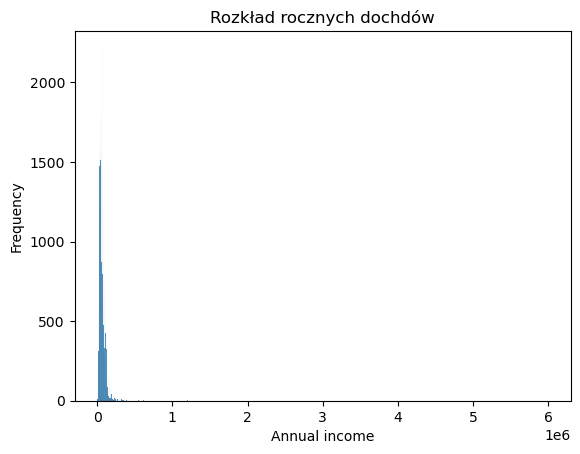

Najwyższy roczny dochód w analizowanej grupie:  6000000.0
Najniższy roczny dochód w analizowanej grupie:  1896.0
Średni roczny dochód w analizowanej grupie:  69135.0
Mediana dochód w analizowanej grupie:  59000.0


In [35]:
#przedstawienie rozkładu rocznych dochodów pożyczkobiorców

sns.histplot(data=dat, x='annual_inc')

plt.title('Rozkład rocznych dochdów')
plt.xlabel('Annual income')
plt.ylabel('Frequency')

plt.show()
#podczas tworzenia histogramu zaobserwowano wartość znacząco odstającą od pozostałych
print('Najwyższy roczny dochód w analizowanej grupie: ',dat.annual_inc.max())
print('Najniższy roczny dochód w analizowanej grupie: ',dat.annual_inc.min())
print('Średni roczny dochód w analizowanej grupie: ',round(dat.annual_inc.mean(),0))
print('Mediana dochód w analizowanej grupie: ',dat.annual_inc.median())

#### Podczas tworzenia histogramu zaobserwowano wartość znacząco odstającą od pozostałych
#### Wartość maksymalna rocznych dochodów wynosi 6 000 000, podczas gdy średnia to 69135, mediana wynosi 59000, a minimalna wartość w całym rozkładzie wynosi 1896

##### Rozkład cechy zostanie wygenrowany ponownie z ograniczeniem na osi x 

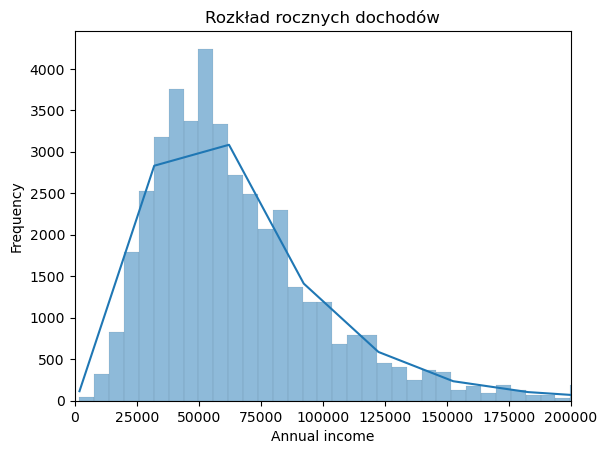

In [36]:
#ponowne wygenerowaie histogramu z ograniczeniem na osie x do 200 000
sns.histplot(data=dat, x='annual_inc', kde=True, bins=1000)

plt.title('Rozkład rocznych dochodów')
plt.xlabel('Annual income')
plt.ylabel('Frequency')

plt.xlim(0, 200_000)

plt.show()

<AxesSubplot:xlabel='dti'>

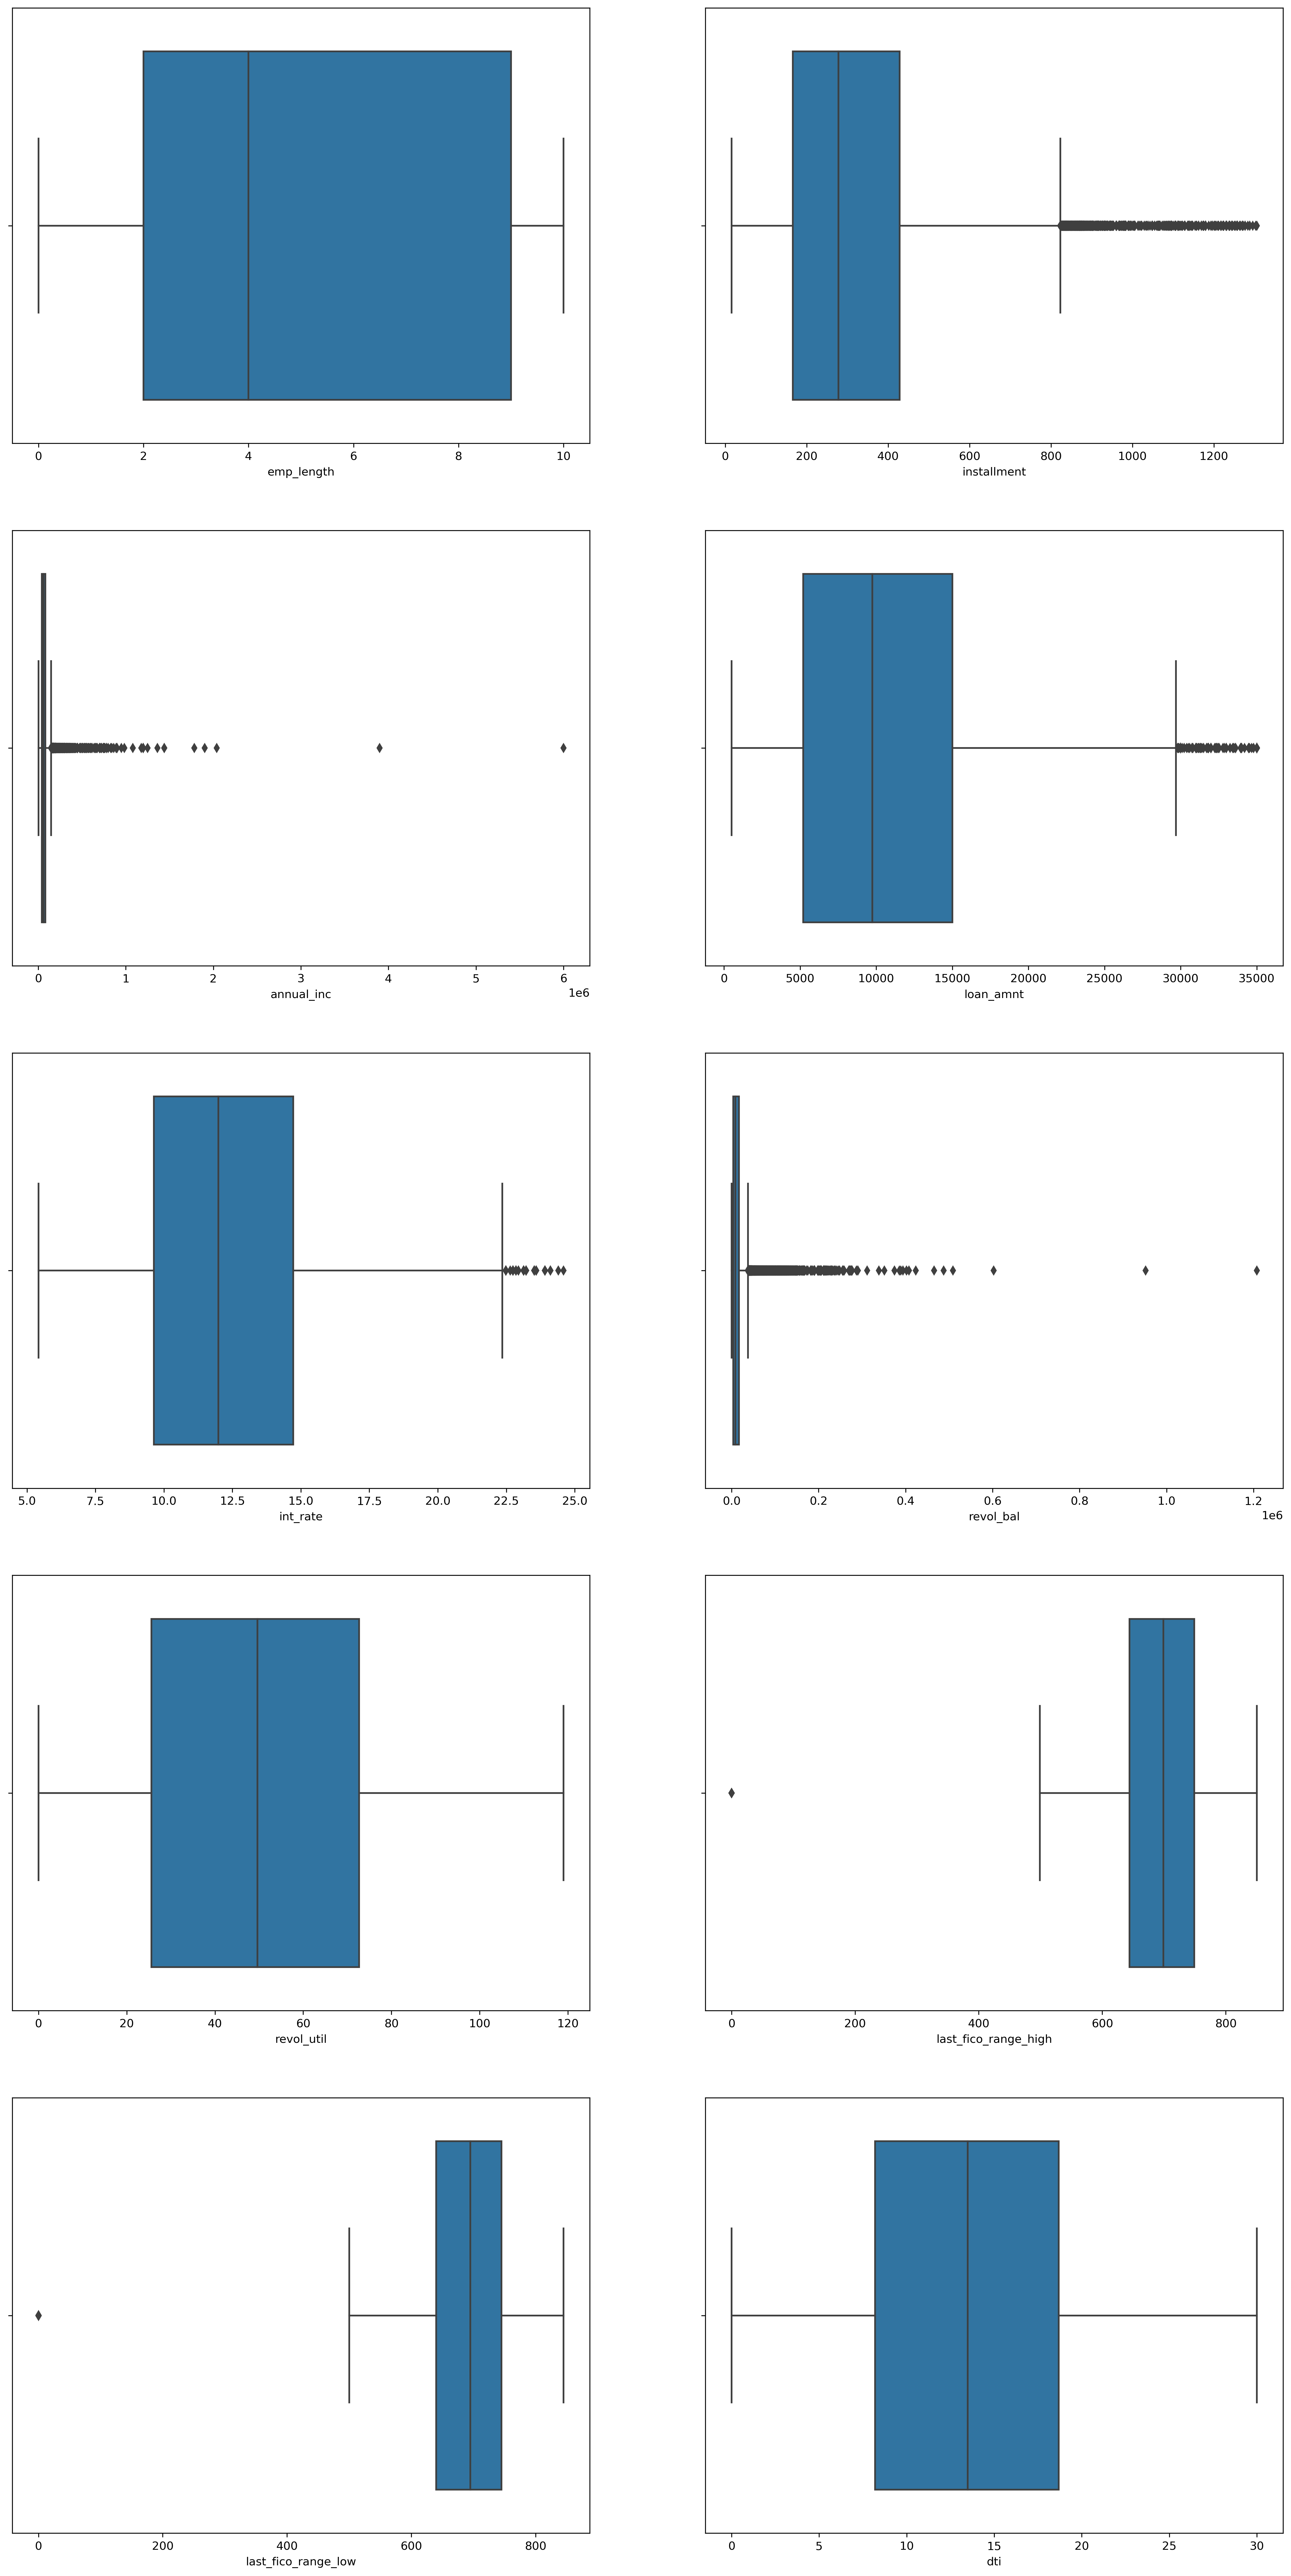

In [37]:
#sprawdzenie outliersów

plt.figure(figsize=(20, 40), dpi=300)
#plt.suptitle('Outliers check')

plt.subplot(5,2,1)
sns.boxplot(x='emp_length', data=dat)

plt.subplot(5,2,2)
sns.boxplot(x='installment', data=dat)

plt.subplot(5,2,3)
sns.boxplot(x='annual_inc', data=dat)

plt.subplot(5,2,4)
sns.boxplot(x='loan_amnt', data=dat)

plt.subplot(5,2,5)
sns.boxplot(x='int_rate', data=dat)

plt.subplot(5,2,6)
sns.boxplot(x='revol_bal', data=dat)

plt.subplot(5,2,7)
sns.boxplot(x='revol_util', data=dat)

plt.subplot(5,2,8)
sns.boxplot(x='last_fico_range_high', data=dat)

plt.subplot(5,2,9)
sns.boxplot(x='last_fico_range_low', data=dat)

plt.subplot(5,2,10)
sns.boxplot(x='dti', data=dat)

<AxesSubplot:xlabel='loan_sts=Fully Paid', ylabel='int_rate'>

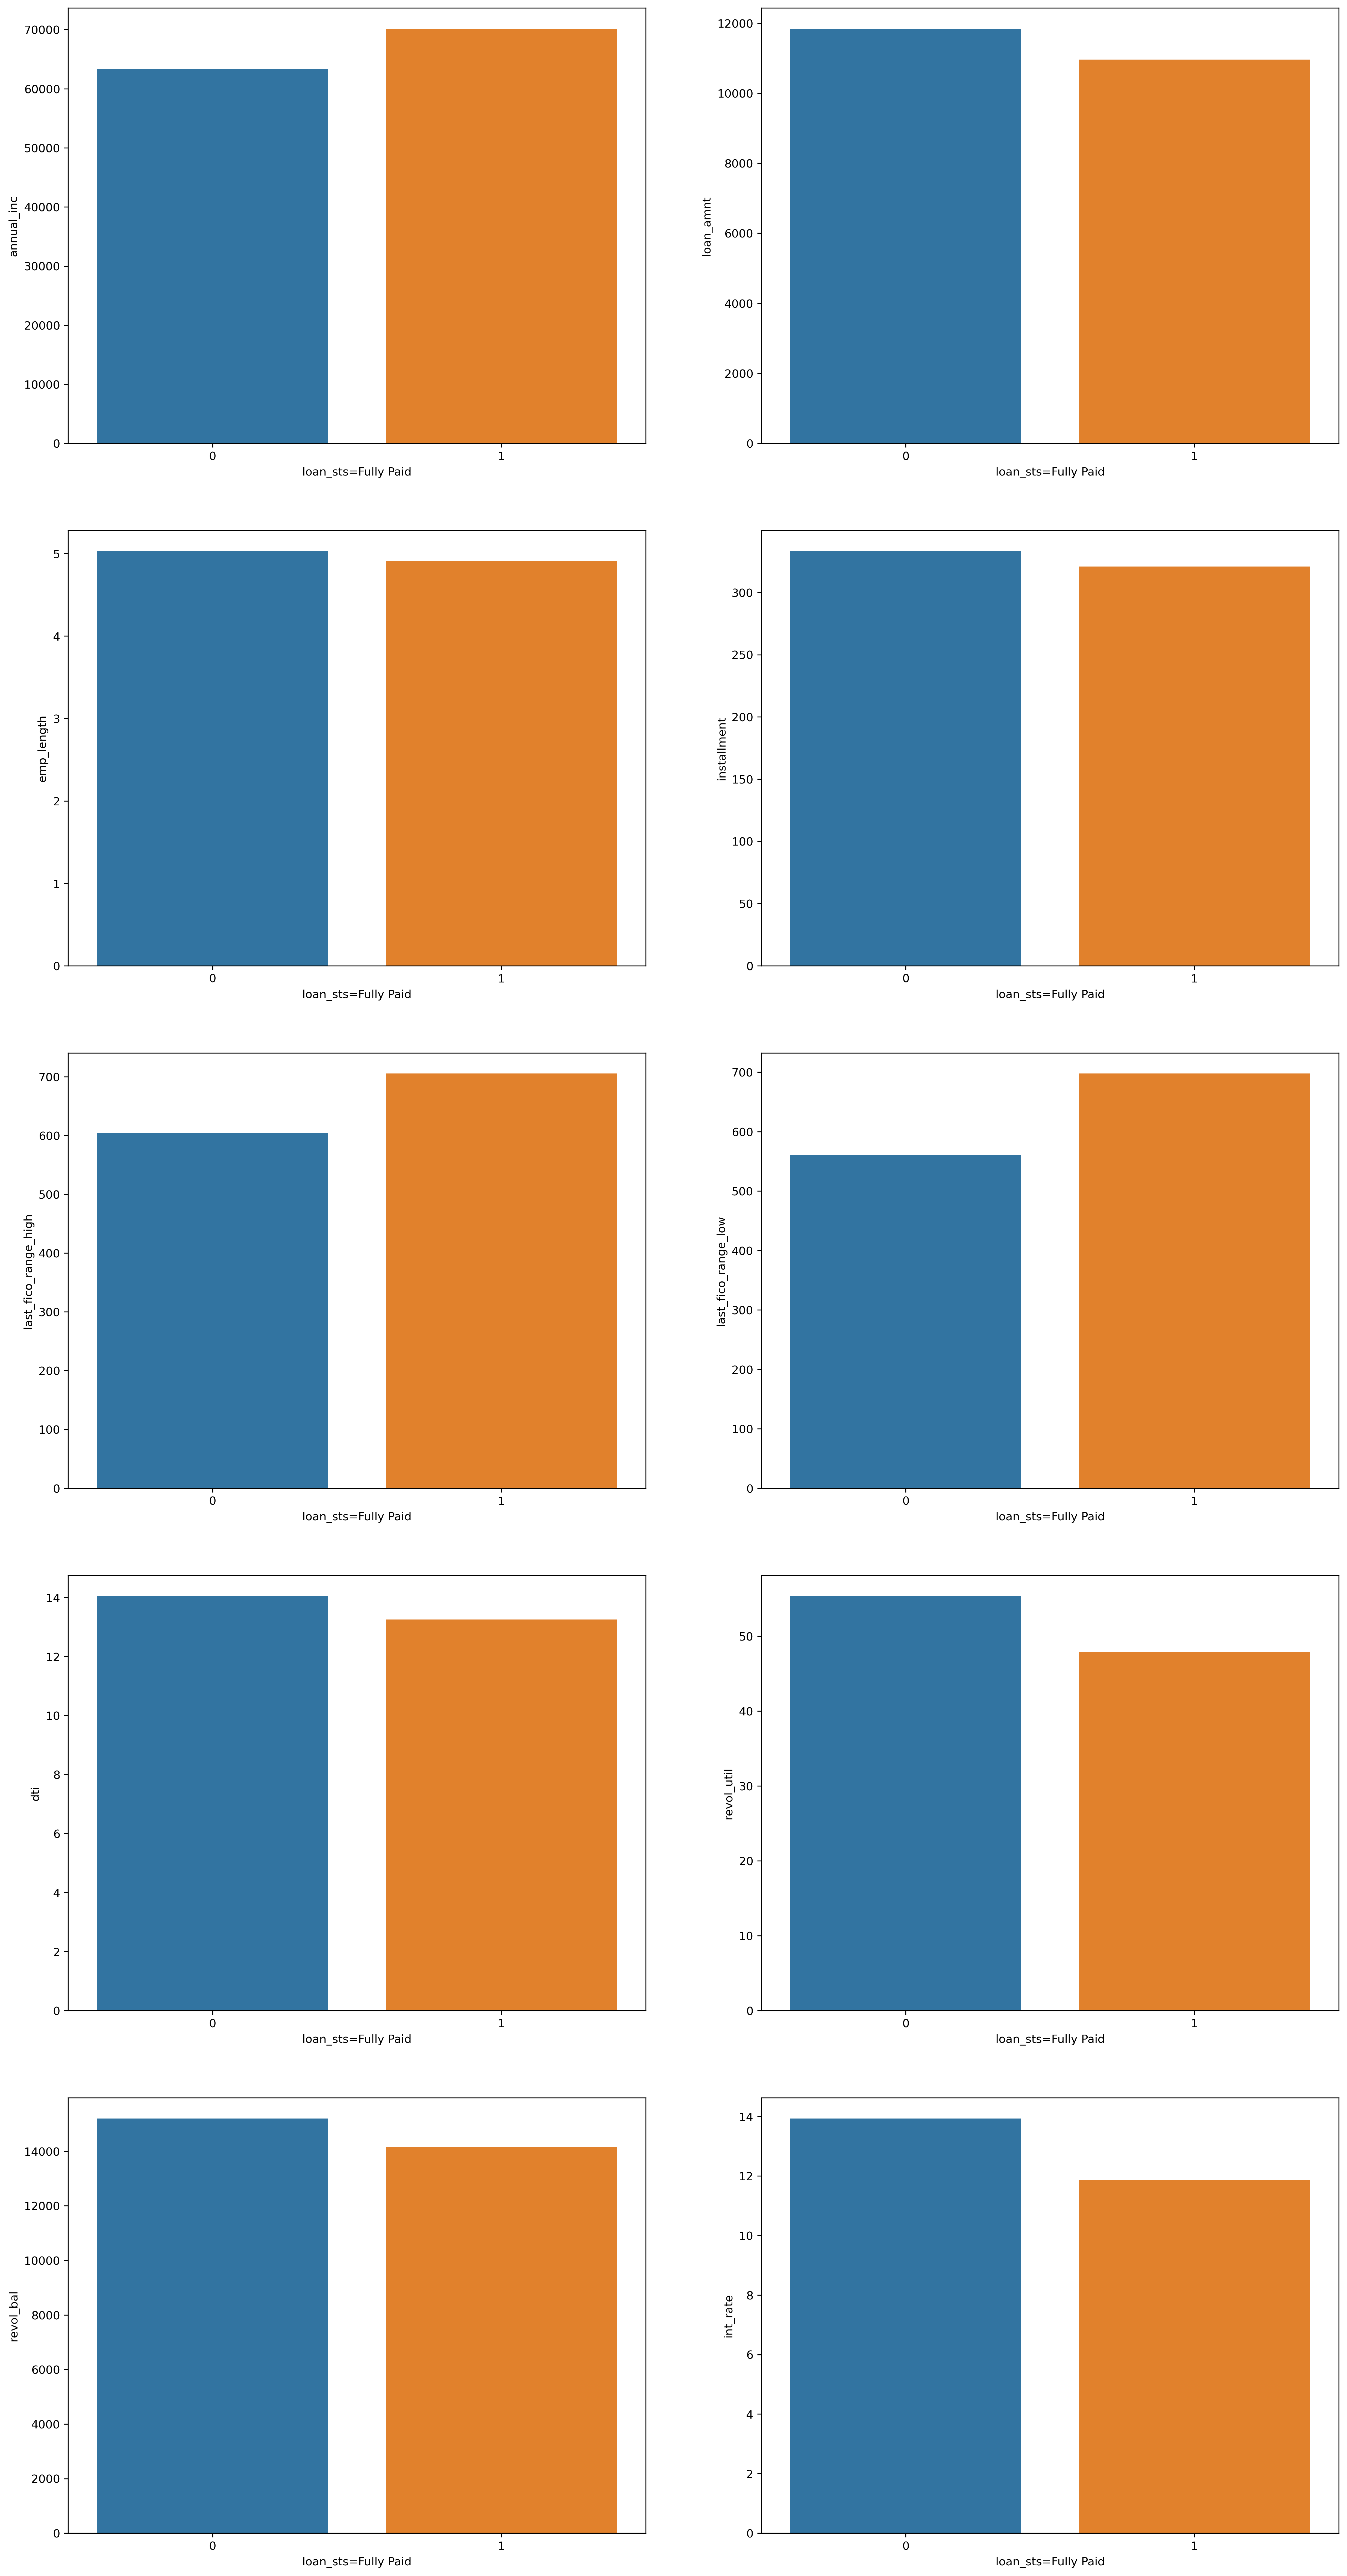

In [38]:
#sprawdzenie średnich wartości danych liczbowych w odniesieniu do statusu końcowego pożyczki

plt.figure(figsize=(20,40),dpi=300)

plt.subplot(5,2,1)
sns.barplot(x='loan_sts=Fully Paid', y='annual_inc', data=dat, ci=None)

plt.subplot(5,2,2)
sns.barplot(x='loan_sts=Fully Paid', y='loan_amnt', data=dat, ci=None)

plt.subplot(5,2,3)
sns.barplot(x='loan_sts=Fully Paid', y='emp_length', data=dat, ci=None)

plt.subplot(5,2,4)
sns.barplot(x='loan_sts=Fully Paid', y='installment', data=dat, ci=None)

plt.subplot(5,2,5)
sns.barplot(x='loan_sts=Fully Paid', y='last_fico_range_high', data=dat, ci=None)

plt.subplot(5,2,6)
sns.barplot(x='loan_sts=Fully Paid', y='last_fico_range_low', data=dat, ci=None)

plt.subplot(5,2,7)
sns.barplot(x='loan_sts=Fully Paid', y='dti', data=dat, ci=None)

plt.subplot(5,2,8)
sns.barplot(x='loan_sts=Fully Paid', y='revol_util', data=dat, ci=None)

plt.subplot(5,2,9)
sns.barplot(x='loan_sts=Fully Paid', y='revol_bal', data=dat, ci=None)

plt.subplot(5,2,10)
sns.barplot(x='loan_sts=Fully Paid', y='int_rate', data=dat, ci=None)

<AxesSubplot:>

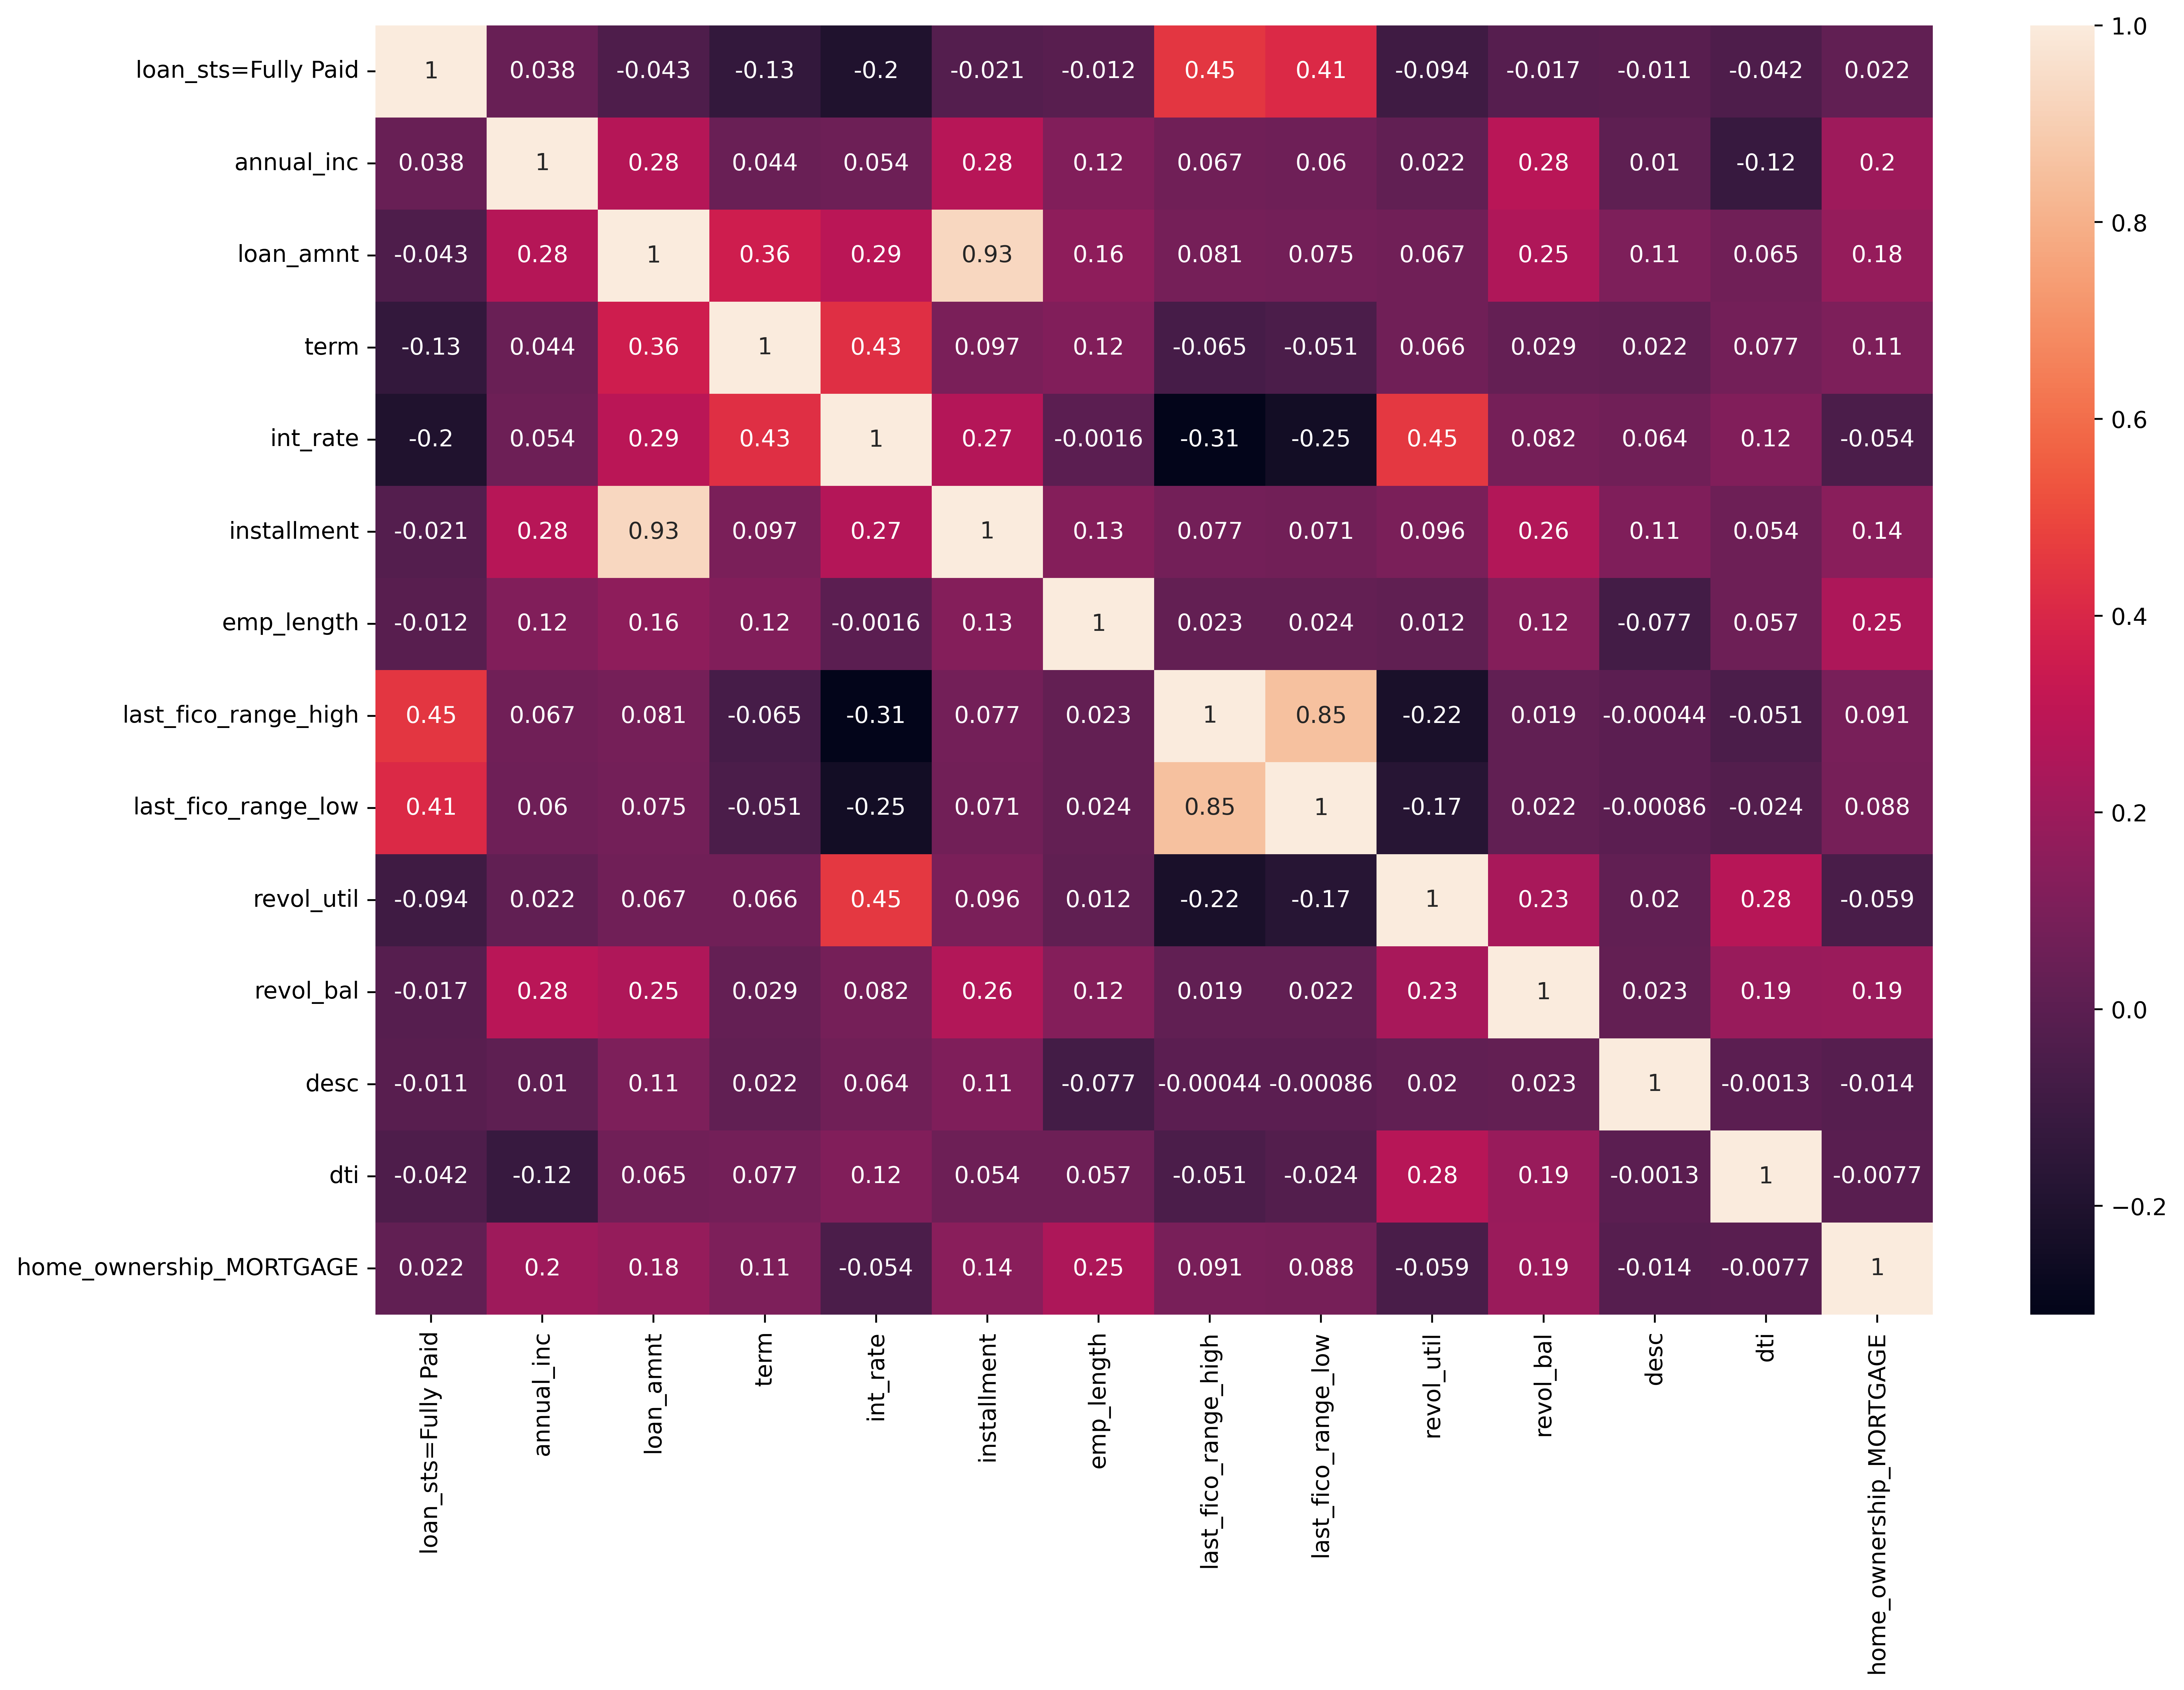

In [39]:
#heatmapa korelacji

#na potrzeby tworzonej heatmapy oraz dla znalezienia odpowiedzi na pytanie nr 3: 'W jaki sposób status kredytu 
#hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?' utworzono tymczosowe zmienną typu dummies
#(trwałe przekształcenie kolumny 'home_ownership' na zmienne typu dummies wykonane zostanie w części 3 Feature Engineering)

dat_temp = pd.get_dummies(dat, columns=['home_ownership'])
heatmap_set = dat_temp[['loan_sts=Fully Paid', 'annual_inc', 'loan_amnt', 'term', 'int_rate', 'installment',
                  'emp_length', 'last_fico_range_high', 'last_fico_range_low', 'revol_util', 'revol_bal',
                  'desc', 'dti', 'home_ownership_MORTGAGE']]

plt.figure(figsize=(15,10), dpi=500)
sns.heatmap(data=heatmap_set.corr(), annot=True)

#### Wnioski z powyższej heatmapy zostaną ujętę w odpowiedziach na część pytań załączonych do projektu

### 1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

#### Odp.: Z analizowanych zmiennych, punktacja FICO osiąga najwyższą wartość współczynnika korelcji (zarówna 'last FICO high' jak i 'low') ze statusem pożyczki (loan_sts=Fully Paid). Należy zatem przyjąć, iż wartości rankingu FICO pożyczkobiorcy ma największy wpływ na ocene ryzyka udzielenia pożyczki (korelacja równa 0.45)

<AxesSubplot:xlabel='last_fico_range_high'>

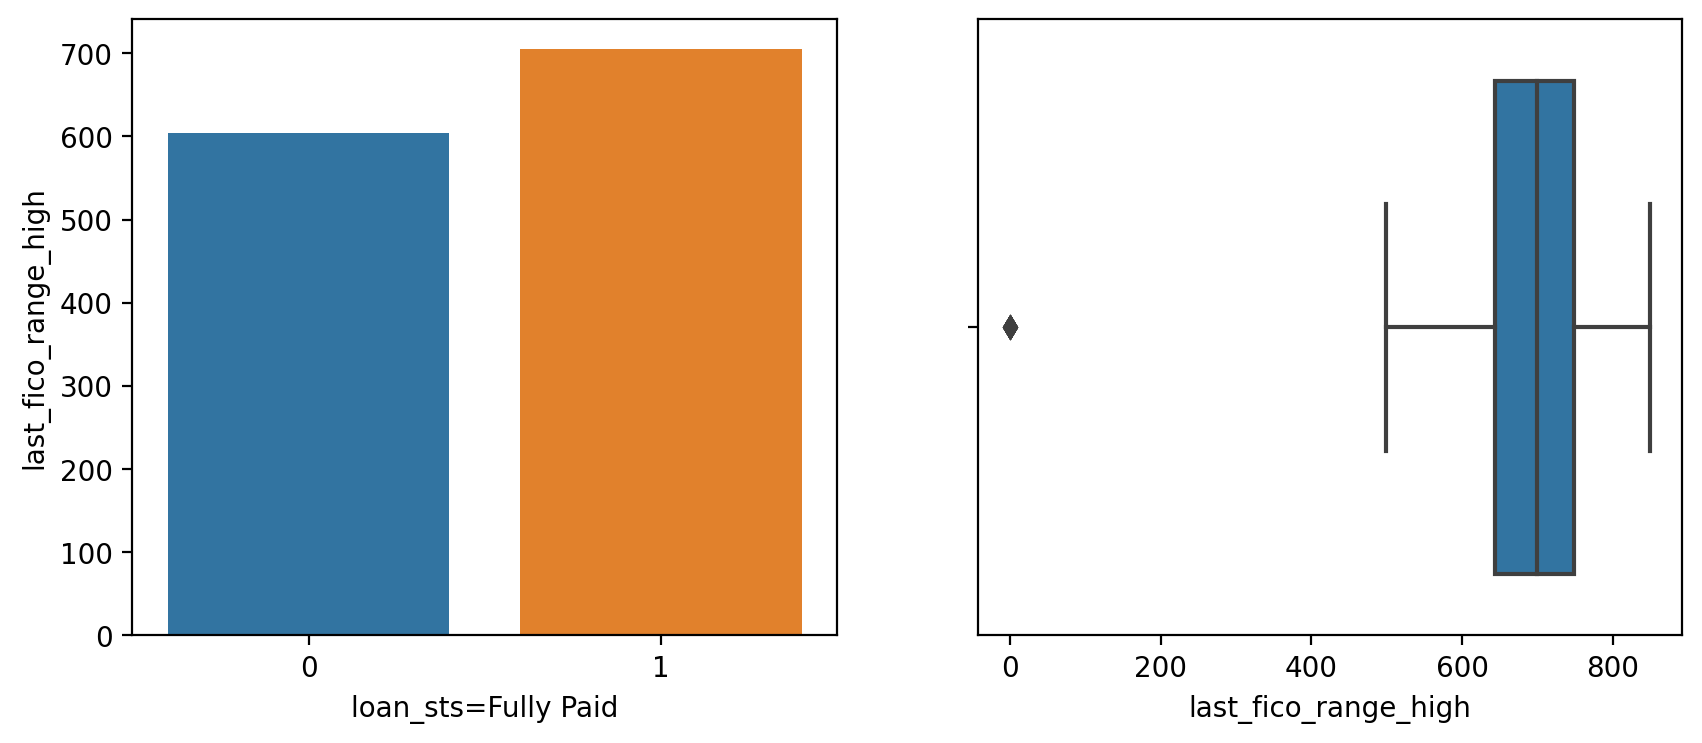

In [40]:
plt.figure(figsize=(10,4),dpi=200)

plt.subplot(1,2,1)
sns.barplot(x='loan_sts=Fully Paid', y='last_fico_range_high', data=dat, ci=None)

plt.subplot(1,2,2)
sns.boxplot(x='last_fico_range_high', data=dat)

In [41]:
print('Średnia punktacja FICO klientów dla pożyczek spłacoych i niespłaconych\n')
print(dat.groupby('loan_sts=Fully Paid')['last_fico_range_high'].mean().round(0))

Średnia punktacja FICO klientów dla pożyczek spłacoych i niespłaconych

loan_sts=Fully Paid
0    604.0
1    705.0
Name: last_fico_range_high, dtype: float64


### 2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO?

#### Odp.: Korelacja pomiędzy wiekiem kredytowym (długością okresu kredytowania) jest drugą po FICO najbardziej wpływającą na ostateczny status pożyczki. Choć wciąż nie jest to wysoka korelacja (-0.13), można przyjąć, iż na tle analizowanych zmiennych im krótszy okres kredytowania, tym prawdopodobieństwo spłacenia pożyczki jest wyższe

In [42]:
plt.suptitle('Zależność pomiedzy statusem końcowym pożyczki, długością okresu kredytowania oraz wynikiem FICO')
#sns.scatterplot(data=dat, x="term", y="loan_sts=Fully Paid", hue="last_fico_range_high", palette='husl')
#histogramy boixplot

Text(0.5, 0.98, 'Zależność pomiedzy statusem końcowym pożyczki, długością okresu kredytowania oraz wynikiem FICO')

<Figure size 640x480 with 0 Axes>

### 3. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

#### Korelacja pomiędzy statusem pożyczki (spłacona / niespłacona) a obciążeniem hipoteką jest znikome (-0.022). Należy zatem przyjąć, że fakt obciążenia hipoteką nie wpływa na spłacalność

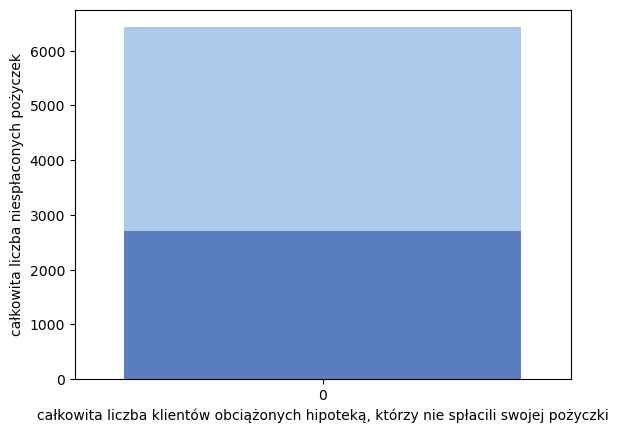

In [43]:
sns.set_color_codes("pastel")
sns.countplot(x='loan_sts=Fully Paid', data=dat[dat['loan_sts=Fully Paid'] == 0], color='b')

sns.set_color_codes('muted')
sns.countplot(x='loan_sts=Fully Paid', data=dat_temp[(dat_temp['home_ownership_MORTGAGE'] == 1) 
                                                     & (dat_temp['loan_sts=Fully Paid'] == 0)], color='b')

plt.ylabel('całkowita liczba niespłaconych pożyczek')
plt.xlabel('całkowita liczba klientów obciążonych hipoteką, którzy nie spłacili swojej pożyczki')
plt.show()
#dwa wykresy splacone niesplacone

### 4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

#### Korelacja pomiędzy statusem pożyczki (spłacona / niespłacona) a rocznym dochodem jest znikoma (0.038). Należy zatem przyjąć, że wysokość rocznego dochodu nie wpływa na spłacalność, a jedynie na wysokość udzielonej pożyczki - korelacja na poziomie 0.28

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

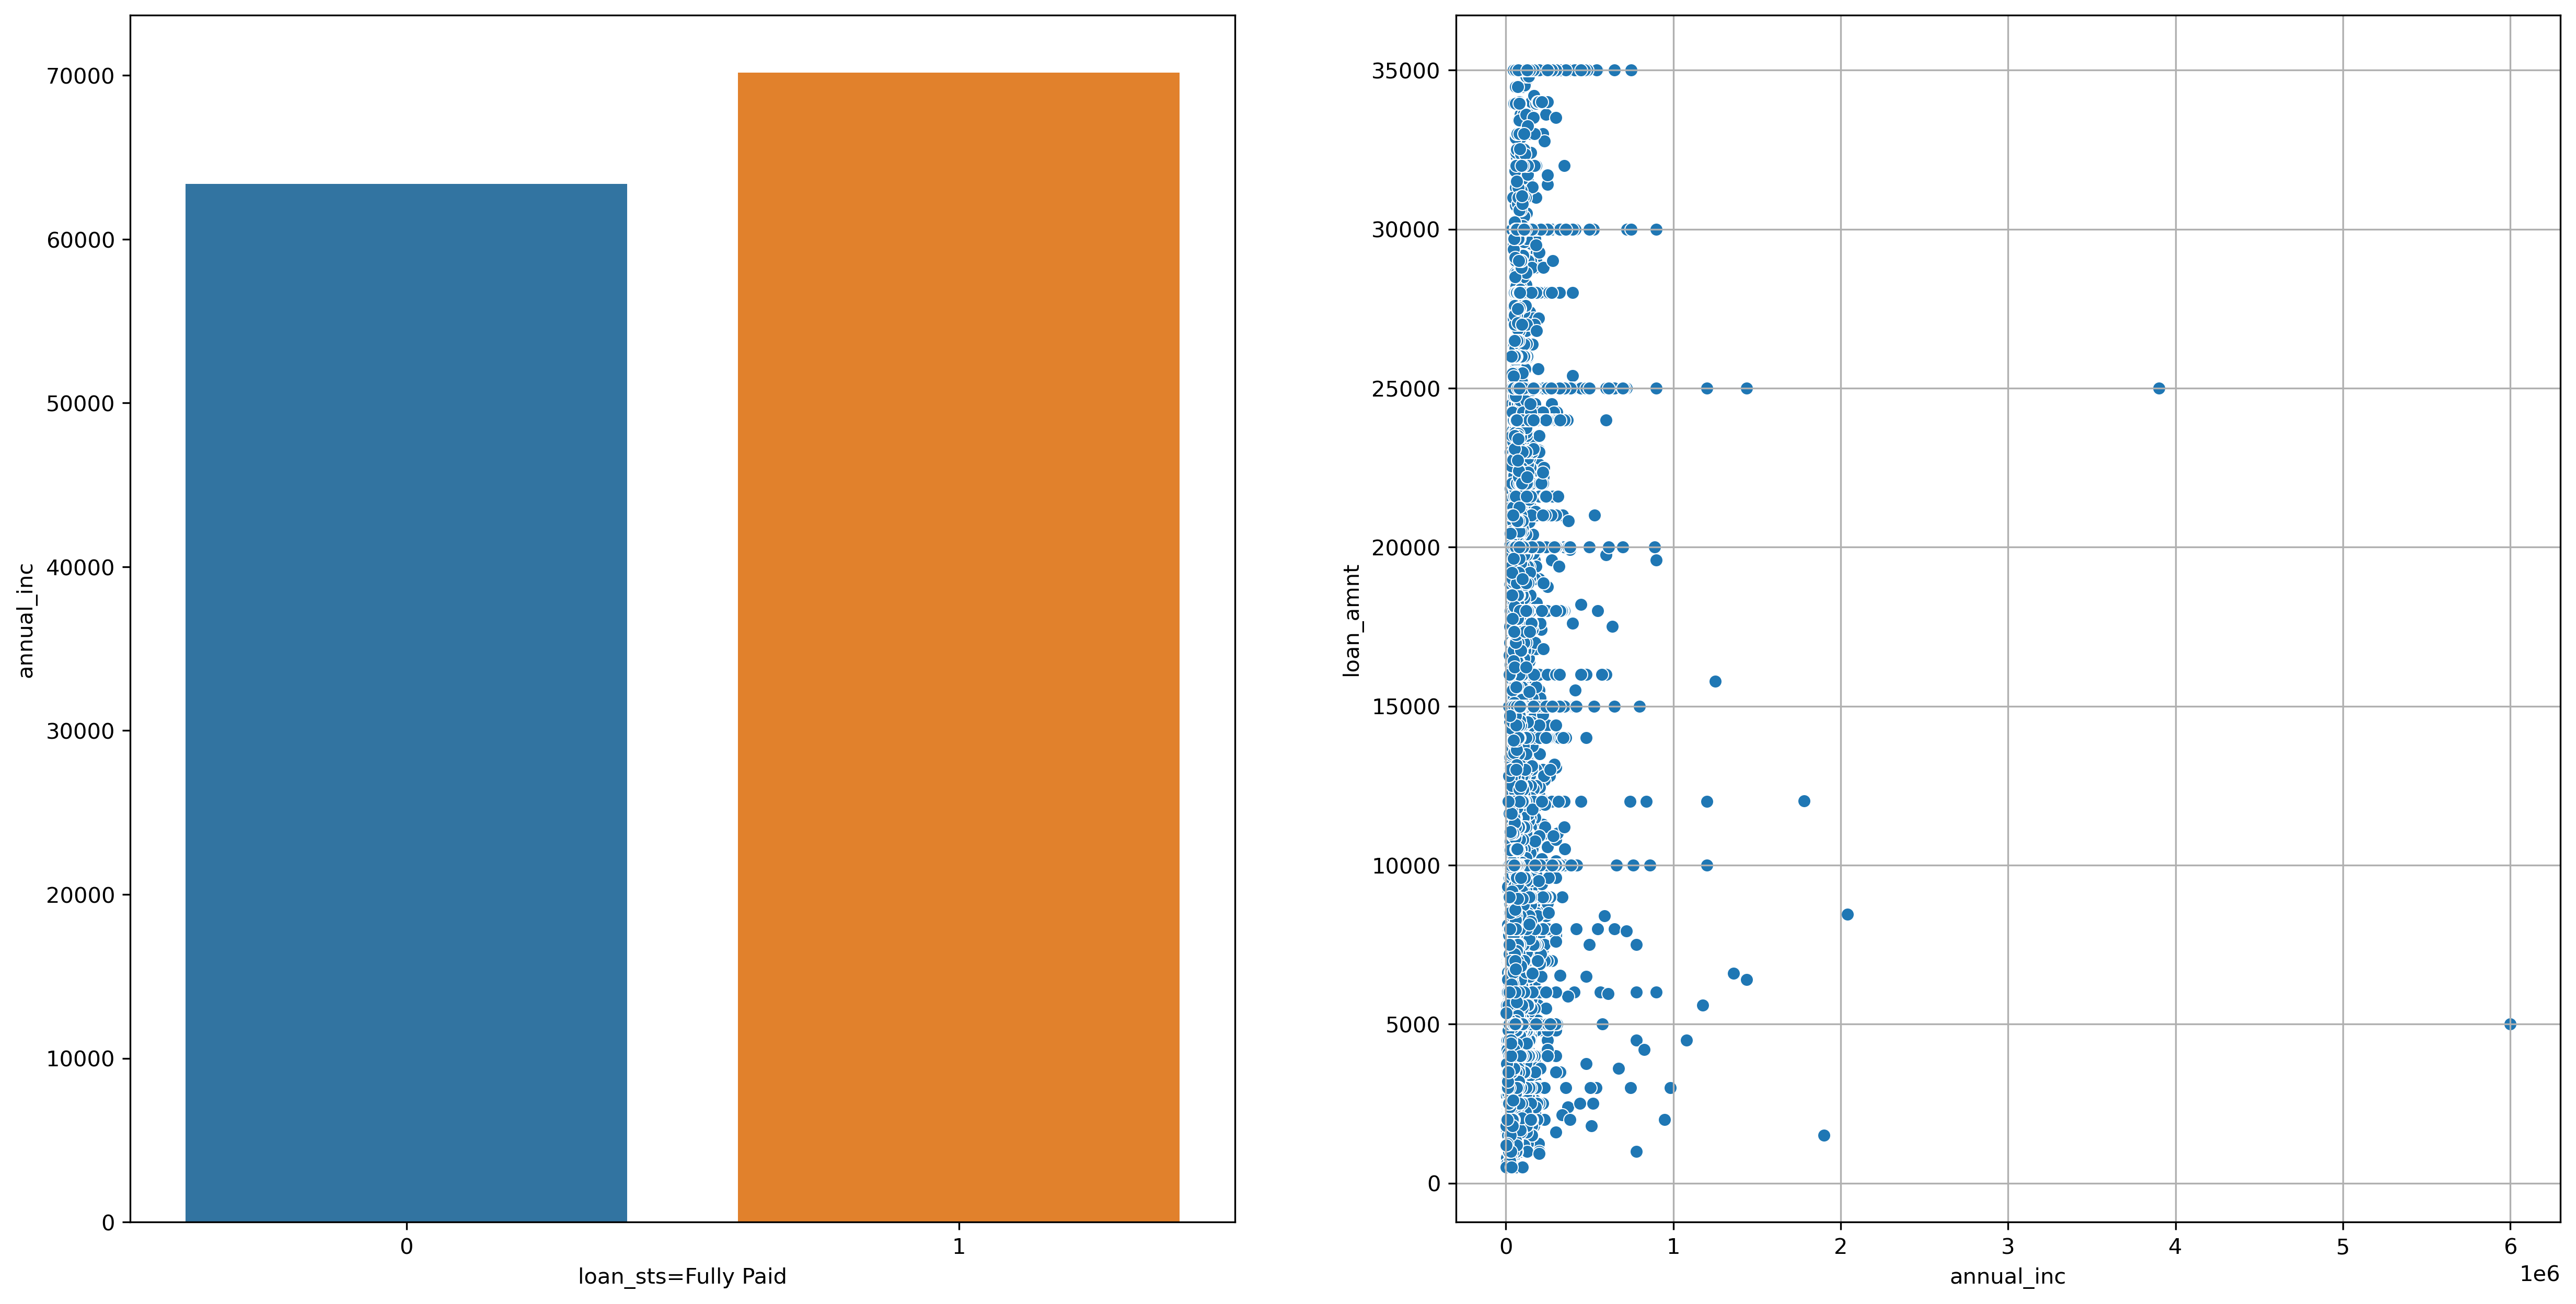

In [44]:
plt.figure(figsize=(20,10), dpi=300)

plt.subplot(1,2,1)
sns.barplot(x='loan_sts=Fully Paid', y='annual_inc', data=dat, ci=None)

plt.subplot(1,2,2)
plt.grid(True)
sns.scatterplot(y='loan_amnt', x='annual_inc', data=dat)
#wbiosek do scatter dodac koloryze wzgledu na sst

In [45]:
print('Średni roczny dochód dla pożyczek spłaconych i niespłaconych\n')
print(dat.groupby('loan_sts=Fully Paid')['annual_inc'].mean().round(2))

Średni roczny dochód dla pożyczek spłaconych i niespłaconych

loan_sts=Fully Paid
0    63386.10
1    70159.68
Name: annual_inc, dtype: float64


### 5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

#### Korelacja pomiędzy statusem pożyczki (spłacona / niespłacona) a hisotrią zatrudnienia (długość zatrudneinia) jest znikoma (-0.012). Należy zatem przyjąć, że długość zatrudnienia nie wpływa na spłacalność

<AxesSubplot:xlabel='loan_sts=Fully Paid', ylabel='emp_length'>

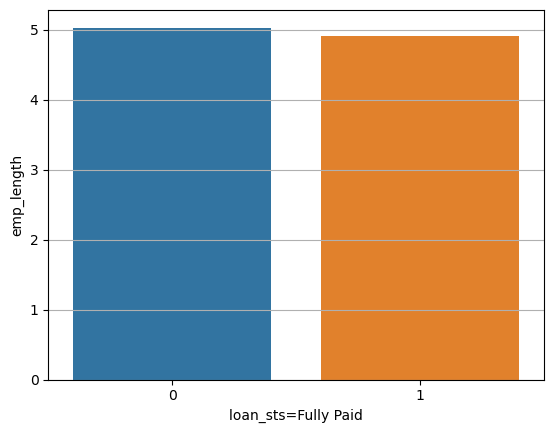

In [46]:
plt.grid(True)
sns.barplot(x='loan_sts=Fully Paid', y='emp_length', data=dat, ci=None)
#boxplot

#### Średni okres zatrudnienia w grupie pożyczek spłaconych i niespłaconych jest niemal równy, co stanowi dodatkowy argument na poparcie tezy o braku wpływu tej zmiennej na spłacalność 

### 6. Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

#### Korelacja pomiędzy statusem pożyczki (spłacona / niespłacona) a jej wysokością jest znikoma (-0.043). Należy zatem przyjąć, że wysokość udzielonej kwoty pożyczki nie wpływa na spłacalność

<AxesSubplot:xlabel='loan_sts=Fully Paid', ylabel='loan_amnt'>

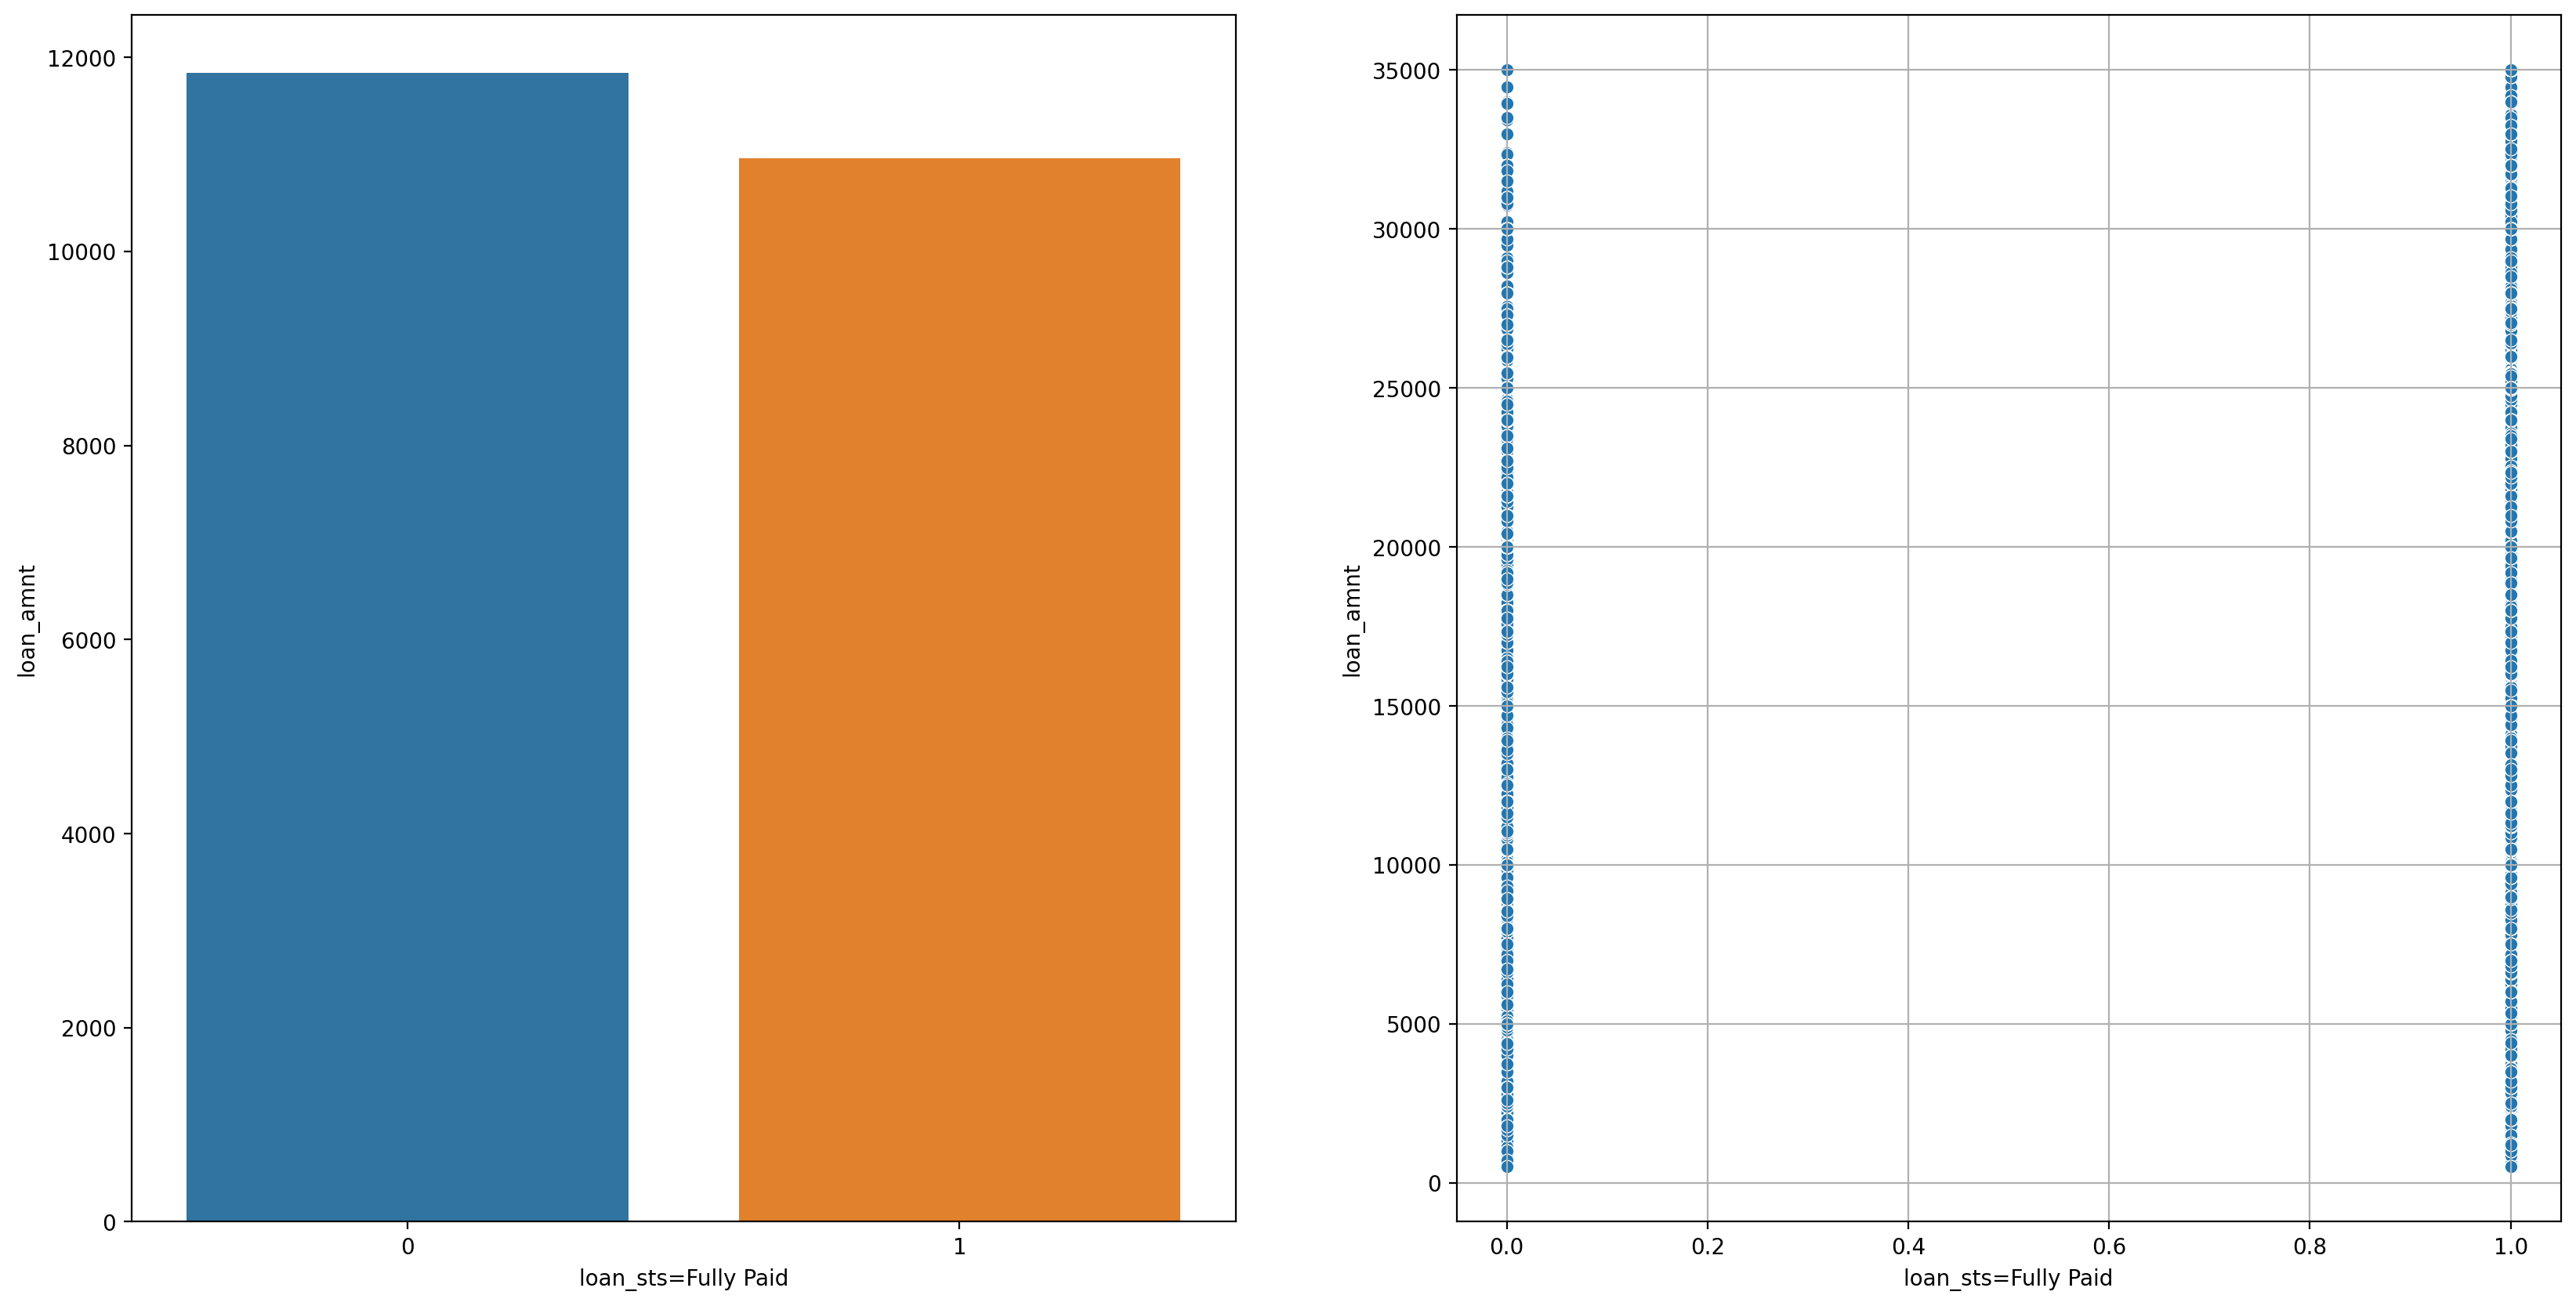

In [47]:
plt.figure(figsize=(20,10), dpi=200)

plt.subplot(1,2,1)
sns.barplot(x='loan_sts=Fully Paid', y='loan_amnt', data=dat, ci=None)

plt.subplot(1,2,2)
plt.grid(True)
sns.scatterplot(x='loan_sts=Fully Paid', y='loan_amnt', data=dat)

#### powyższe wykresy obrazują podobieństwo wysokości kwoty udzielonej pożyczki w obu grupach (spłacona / niespłacona) potwierdzając niską korelację

# Część 3 - feature engineering

In [48]:
#podgląd danych
dat.head(20)
print('Ilosc kolumn przed feature engineering: ', dat.shape[1])

Ilosc kolumn przed feature engineering:  25


In [49]:
#z podglądu danych wywnioskowano, iż kolumna home_ownership nadaje się do zastosowania dummy coding
dat = pd.get_dummies(dat, columns=['home_ownership'], prefix='home_own', prefix_sep='=')
dat.head(10)

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0     5000.0  36.0     10.65       162.87     B        B2        10.0   
1     2500.0  60.0     15.27        59.83     C        C4         0.0   
2     2400.0  36.0     15.96        84.33     C        C5        10.0   
3    10000.0  36.0     13.49       339.31     C        C1        10.0   
4     3000.0  60.0     12.69        67.79     B        B5         1.0   
5     5000.0  36.0      7.90       156.46     A        A4         3.0   
6     7000.0  60.0     15.96       170.08     C        C5         8.0   
7     3000.0  36.0     18.64       109.43     E        E1         9.0   
8     5600.0  60.0     21.28       152.39     F        F2         4.0   
9     5375.0  60.0     12.69       121.45     B        B5         0.0   

   annual_inc verification_status  desc  ... last_fico_range_high  \
0     24000.0            Verified    78  ...                739.0   
1     30000.0            Verified   590  ...                499.0   
2     12252.0        Not Verified     0  ...                739.0   
3     49200.0            Verified   180  ...                604.0   
4     80000.0            Verified   306  ...                684.0   
5     36000.0            Verified     0  ...                564.0   
6     47004.0        Not Verified   279  ...                654.0   
7     48000.0            Verified    57  ...                689.0   
8     40000.0            Verified   322  ...                499.0   
9     15000.0            Verified   473  ...                504.0   

   last_fico_range_low  acc_now_delinq  debt_settlement_flag  \
0                735.0             0.0                     0   
1                  0.0             0.0                     0   
2                735.0             0.0                     0   
3                600.0             0.0                     0   
4                680.0             0.0                     0   
5                560.0             0.0                     0   
6                650.0             0.0                     0   
7                685.0             0.0                     0   
8                  0.0             0.0                     0   
9                500.0             0.0                     0   

   loan_sts=Fully Paid  home_own=MORTGAGE  home_own=NONE  home_own=OTHER  \
0                    1                  0              0               0   
1                    0                  0              0               0   
2                    1                  0              0               0   
3                    1                  0              0               0   
4                    1                  0              0               0   
5                    1                  0              0               0   
6                    1                  0              0               0   
7                    1                  0              0               0   
8                    0                  0              0               0   
9                    0                  0              0               0   

   home_own=OWN  home_own=RENT  
0             0              1  
1             0              1  
2             0              1  
3             0              1  
4             0              1  
5             0              1  
6             0              1  
7             0              1  
8             1              0  
9             0              1  

[10 rows x 29 columns]

In [50]:
#do tej samej operacji nadaje się również kolumna verification_status
dat = pd.get_dummies(dat, columns=['verification_status'], prefix='inc_sts', prefix_sep='=', drop_first=True)
dat.head(10)

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0     5000.0  36.0     10.65       162.87     B        B2        10.0   
1     2500.0  60.0     15.27        59.83     C        C4         0.0   
2     2400.0  36.0     15.96        84.33     C        C5        10.0   
3    10000.0  36.0     13.49       339.31     C        C1        10.0   
4     3000.0  60.0     12.69        67.79     B        B5         1.0   
5     5000.0  36.0      7.90       156.46     A        A4         3.0   
6     7000.0  60.0     15.96       170.08     C        C5         8.0   
7     3000.0  36.0     18.64       109.43     E        E1         9.0   
8     5600.0  60.0     21.28       152.39     F        F2         4.0   
9     5375.0  60.0     12.69       121.45     B        B5         0.0   

   annual_inc  desc addr_state  ...  last_fico_range_low  acc_now_delinq  \
0     24000.0    78         AZ  ...                735.0             0.0   
1     30000.0   590         GA  ...                  0.0             0.0   
2     12252.0     0         IL  ...                735.0             0.0   
3     49200.0   180         CA  ...                600.0             0.0   
4     80000.0   306         OR  ...                680.0             0.0   
5     36000.0     0         AZ  ...                560.0             0.0   
6     47004.0   279         NC  ...                650.0             0.0   
7     48000.0    57         CA  ...                685.0             0.0   
8     40000.0   322         CA  ...                  0.0             0.0   
9     15000.0   473         TX  ...                500.0             0.0   

   debt_settlement_flag  loan_sts=Fully Paid  home_own=MORTGAGE  \
0                     0                    1                  0   
1                     0                    0                  0   
2                     0                    1                  0   
3                     0                    1                  0   
4                     0                    1                  0   
5                     0                    1                  0   
6                     0                    1                  0   
7                     0                    1                  0   
8                     0                    0                  0   
9                     0                    0                  0   

   home_own=NONE  home_own=OTHER  home_own=OWN  home_own=RENT  \
0              0               0             0              1   
1              0               0             0              1   
2              0               0             0              1   
3              0               0             0              1   
4              0               0             0              1   
5              0               0             0              1   
6              0               0             0              1   
7              0               0             0              1   
8              0               0             1              0   
9              0               0             0              1   

   inc_sts=Verified  
0                 1  
1                 1  
2                 0  
3                 1  
4                 1  
5                 1  
6                 0  
7                 1  
8                 1  
9                 1  

[10 rows x 29 columns]

In [51]:
#utworzenie kolumny przedstawiającej stosunek wysokości pożyczki do rocznych dochodów
dat['loan_to_income_ratio'] = dat['loan_amnt'] / dat['annual_inc']

In [52]:
#utworzenie kolumny ze słownym opisem rankingu FICO pożyczkobiorcy na podstawie źródłowego pliku pdf
#funckja klasyfikująca wynik
def fico_rating(x):
    if x < 580:
        return 'Poor'
    elif x in range(580,670):
        return 'Fair'
    elif x in range(671,740):
        return 'Good'
    elif x in range(741,800):
        return 'Very Good'
    elif x >= 800:
        return 'Exceptional'

#zaimplementowanie funckji
dat['last_fico_rating_high'] = dat.apply(lambda x: fico_rating(x['last_fico_range_high']), axis=1)
dat['last_fico_rating_low'] = dat.apply(lambda x: fico_rating(x['last_fico_range_low']), axis=1)

dat[['last_fico_range_high' , 'last_fico_rating_high' , 'last_fico_range_low' , 'last_fico_rating_low']].head(10)

last_fico_range_high last_fico_rating_high  last_fico_range_low  \
0                 739.0                  Good                735.0   
1                 499.0                  Poor                  0.0   
2                 739.0                  Good                735.0   
3                 604.0                  Fair                600.0   
4                 684.0                  Good                680.0   
5                 564.0                  Poor                560.0   
6                 654.0                  Fair                650.0   
7                 689.0                  Good                685.0   
8                 499.0                  Poor                  0.0   
9                 504.0                  Poor                500.0   

  last_fico_rating_low  
0                 Good  
1                 Poor  
2                 Good  
3                 Fair  
4                 Good  
5                 Poor  
6                 Fair  
7                 Good  
8                 Poor  
9                 Poor

In [53]:
#utworzenie kolumny przedstawiajacej różnicę pomiędzy najwyższym i najniższym ostatnim odczytem FICO pożyczkobiorcy
dat['fico_range_diff'] = dat['last_fico_range_high'] - dat['last_fico_range_low']

dat[['last_fico_range_high' , 'last_fico_range_low', 'fico_range_diff']].head(10)

last_fico_range_high  last_fico_range_low  fico_range_diff
0                 739.0                735.0              4.0
1                 499.0                  0.0            499.0
2                 739.0                735.0              4.0
3                 604.0                600.0              4.0
4                 684.0                680.0              4.0
5                 564.0                560.0              4.0
6                 654.0                650.0              4.0
7                 689.0                685.0              4.0
8                 499.0                  0.0            499.0
9                 504.0                500.0              4.0

In [54]:
#utworzenie kolumny przedstawiającej średnią wysokośc udzielonej pożyczki dla każdego kwalifikatora FICO

dat['avg_loan_amnt_by_FICO_rating'] = dat.groupby(['last_fico_rating_high'])['loan_amnt'].transform('mean').round(0)

dat[['last_fico_rating_high' , 'avg_loan_amnt_by_FICO_rating']].sample(20)

last_fico_rating_high  avg_loan_amnt_by_FICO_rating
16720                  Good                       11384.0
19498                  Poor                        9925.0
1440              Very Good                       11431.0
18049                  Fair                       10594.0
10175                  Good                       11384.0
23803                  Good                       11384.0
19801                  Fair                       10594.0
8583              Very Good                       11431.0
26919                  Good                       11384.0
9249              Very Good                       11431.0
25110                  Poor                        9925.0
31238           Exceptional                       12306.0
21897                  Good                       11384.0
861               Very Good                       11431.0
41722                  Fair                       10594.0
30252                  Good                       11384.0
37354                  Fair                       10594.0
36503                  Good                       11384.0
40278                  Good                       11384.0
41616                  Good                       11384.0

In [55]:
#utworzenie kolumny przedstawiajacej srednia dlugosc zatrudnienia dla kazdego kwalifikatora FICO

dat['avg_emp_length_by_fico_rating'] = dat.groupby(['last_fico_rating_high'])['emp_length'].transform('mean').round(1)

dat[['last_fico_rating_high' , 'avg_emp_length_by_fico_rating']].sample(10)

last_fico_rating_high  avg_emp_length_by_fico_rating
11472                  Fair                            4.9
31816             Very Good                            4.9
31427           Exceptional                            5.5
5029                   Fair                            4.9
23609                  Fair                            4.9
24401             Very Good                            4.9
24256             Very Good                            4.9
21382                  Fair                            4.9
29523                  Fair                            4.9
34841             Very Good                            4.9

In [56]:
#utworzenie kolumny przedstawiajacej sredni roczny dochod dla kazdego kwalifikatora FICO

dat['avg_annual_inc_by_FICO'] = dat.groupby(['last_fico_rating_high'])['annual_inc'].transform('mean').round(0)

dat[['last_fico_rating_high' , 'avg_annual_inc_by_FICO']]

last_fico_rating_high  avg_annual_inc_by_FICO
0                      Good                 71769.0
1                      Poor                 61298.0
2                      Good                 71769.0
3                      Fair                 64350.0
4                      Good                 71769.0
...                     ...                     ...
42509                  Good                 71769.0
42511                  Poor                 61298.0
42512           Exceptional                 76045.0
42513             Very Good                 72137.0
42514                  Poor                 61298.0

[42506 rows x 2 columns]

In [57]:
#utowrzenie kolumny przedstwiającej stosunek wysokości raty do rocznego dochodu Payment to Income (PTI)
dat['payment_to_income_ratio'] = dat['installment'] / dat['annual_inc']

dat[['installment' , 'annual_inc', 'payment_to_income_ratio']].head(10)

installment  annual_inc  payment_to_income_ratio
0       162.87     24000.0                 0.006786
1        59.83     30000.0                 0.001994
2        84.33     12252.0                 0.006883
3       339.31     49200.0                 0.006897
4        67.79     80000.0                 0.000847
5       156.46     36000.0                 0.004346
6       170.08     47004.0                 0.003618
7       109.43     48000.0                 0.002280
8       152.39     40000.0                 0.003810
9       121.45     15000.0                 0.008097

In [58]:
#utworzenie kolumny przedstawiająca całkowitą kwotę do zapłaty
dat['total_loan_payment'] = dat['installment'] * dat['term']

dat[['installment' , 'term', 'total_loan_payment']].head(10)

installment  term  total_loan_payment
0       162.87  36.0             5863.32
1        59.83  60.0             3589.80
2        84.33  36.0             3035.88
3       339.31  36.0            12215.16
4        67.79  60.0             4067.40
5       156.46  36.0             5632.56
6       170.08  60.0            10204.80
7       109.43  36.0             3939.48
8       152.39  60.0             9143.40
9       121.45  60.0             7287.00

In [59]:
#utworzenie kolumny określającej, czy osiągany roczny dochód jest powyżej, czy poniżej średniej
#przypisanie wartości średniego rocznego dochodu do zmiennej avg_
avg_ = round(dat.annual_inc.mean(),0)

#utworzenie funckji kwalifikujacej dochód jako powyżej lub poniżej średniej
def is_avg(x,y):
    return 'Above average' if x > y else 'Below average' if x < y else 'Average'

#zaimplementowanie funckji
dat['inc_class'] = dat.apply(lambda x: is_avg(x['annual_inc'],avg_), axis=1)

dat[['annual_inc' , 'inc_class']].head(10)

annual_inc      inc_class
0     24000.0  Below average
1     30000.0  Below average
2     12252.0  Below average
3     49200.0  Below average
4     80000.0  Above average
5     36000.0  Below average
6     47004.0  Below average
7     48000.0  Below average
8     40000.0  Below average
9     15000.0  Below average

In [60]:
#kolumna klasyfikująca pisemne uzasadnienie wniosku jako szeczegółowy lub krótki na podstawie ilości znaków 
#przypisanie wartości mediany ilości znaków z kolumny 'desc' do zmiennej med
med = dat.desc.median()

#utworzenie funckji kwalifikujacej uzasadnienie wniosku jako szczegółowy lub krótki
def above_or_below(x,y):
    return 'Detailed' if x >= y else 'Short'

#zaimplementowanie funckji
dat['desc_classification'] = dat.apply(lambda x: above_or_below(x['desc'], med), axis=1)

dat[['desc' , 'desc_classification']].head(10)

desc desc_classification
0    78               Short
1   590            Detailed
2     0               Short
3   180            Detailed
4   306            Detailed
5     0               Short
6   279            Detailed
7    57               Short
8   322            Detailed
9   473            Detailed

In [61]:
#dodanie kolumny określającej średnie zarobki dla poszczególnych stanów

dat['avg_inc_by_state'] = dat.groupby(['addr_state'])['annual_inc'].transform('mean').round(0)
dat[['addr_state' , 'annual_inc' , 'avg_inc_by_state']]

addr_state  annual_inc  avg_inc_by_state
0             AZ     24000.0           67800.0
1             GA     30000.0           69280.0
2             IL     12252.0           69790.0
3             CA     49200.0           72221.0
4             OR     80000.0           57726.0
...          ...         ...               ...
42509         NJ      4000.0           74483.0
42511         GA     50000.0           69280.0
42512         CT    150000.0           75802.0
42513         CT     20000.0           75802.0
42514         NJ     30000.0           74483.0

[42506 rows x 3 columns]

In [62]:
#utowrzenie kolumny określającej średnią wyskość wnioskowanej pożyczki w zależności od stanu, w którym mieszka klient

dat['avg_loan_by_state'] = dat.groupby(['addr_state'])['loan_amnt'].transform('mean').round(0)

dat[['addr_state' , 'avg_loan_by_state']]

addr_state  avg_loan_by_state
0             AZ            10889.0
1             GA            11193.0
2             IL            11381.0
3             CA            11284.0
4             OR            10591.0
...          ...                ...
42509         NJ            11627.0
42511         GA            11193.0
42512         CT            11336.0
42513         CT            11336.0
42514         NJ            11627.0

[42506 rows x 2 columns]

In [63]:
#utworzenie kolumny przypisującej słowne etykiety w zależnosci od długości zatrudnienia

labels = ['entry' , 'junior' , 'mid' , 'senior']
dat['prof_rank'] = pd.cut(dat['emp_length'], bins=4, labels=labels)

dat[['emp_length' , 'prof_rank']].sample(10)

emp_length prof_rank
31726         2.0     entry
28555         3.0    junior
28240         3.0    junior
42050         0.0     entry
18756         7.0       mid
19725        10.0    senior
22296         0.0     entry
25539        10.0    senior
19306         6.0       mid
21146         0.0     entry

In [64]:
#utworzenie kolumny przedstawiajaca sredni roczny dochod dla kazdej kategorii zawodowej

dat['avg_inc_by_rank'] = dat.groupby(['prof_rank'])['annual_inc'].transform('mean').round(0)

dat[['prof_rank' , 'avg_inc_by_rank']].sample(10)

prof_rank  avg_inc_by_rank
23579    senior          80544.0
35218     entry          62052.0
2295      entry          62052.0
937      senior          80544.0
245      junior          65834.0
8605     junior          65834.0
13841       mid          67952.0
8489     senior          80544.0
22146    senior          80544.0
34901    junior          65834.0

In [65]:
#utworzenie kolumny przedstwiającej średnia wyskość pożyczki w poszczególnych grupach zawodowych

dat['avg_loan_by_prof_rank'] = dat.groupby(['prof_rank'])['loan_amnt'].transform('mean').round(0)

dat[['prof_rank' , 'avg_loan_by_prof_rank']].sample(10)

prof_rank  avg_loan_by_prof_rank
40619    junior                10721.0
13890     entry                 9857.0
1823      entry                 9857.0
15395     entry                 9857.0
27159    junior                10721.0
33193    senior                12708.0
22931     entry                 9857.0
39350     entry                 9857.0
41123    junior                10721.0
33374     entry                 9857.0

In [66]:
#utworzenie kolumny przedstawiajacej średnie oprocentowanie pożyczki w zależnosci od okresu kredytowania

dat['avg_int_rate_by_term'] = dat.groupby(['term'])['int_rate'].transform('mean').round(2)

dat[['term' , 'avg_int_rate_by_term']].sample(1000)

term  avg_int_rate_by_term
11057  60.0                 14.86
23567  36.0                 11.23
28535  60.0                 14.86
7037   36.0                 11.23
36589  36.0                 11.23
...     ...                   ...
4841   36.0                 11.23
22047  36.0                 11.23
21384  36.0                 11.23
35213  36.0                 11.23
11299  60.0                 14.86

[1000 rows x 2 columns]

In [67]:
#utworzenie kolumny przedstawiajacej srendi roczny dochod w odniesieniu do statusu spłaty pożyczki

dat['avg_annual_inc_by_loan_sts'] = dat.groupby(['loan_sts=Fully Paid'])['annual_inc'].transform('mean').round(0)

dat[['loan_sts=Fully Paid','avg_annual_inc_by_loan_sts']]

loan_sts=Fully Paid  avg_annual_inc_by_loan_sts
0                        1                     70160.0
1                        0                     63386.0
2                        1                     70160.0
3                        1                     70160.0
4                        1                     70160.0
...                    ...                         ...
42509                    1                     70160.0
42511                    1                     70160.0
42512                    1                     70160.0
42513                    1                     70160.0
42514                    1                     70160.0

[42506 rows x 2 columns]

In [68]:
#utworzenie kolumny przedstawiajacej srednia dlugosc zatrudnienia w odniesieniu do statusu spłaty pożyczki

dat['avg_emp_length_by_loan_sts'] = dat.groupby(['loan_sts=Fully Paid'])['emp_length'].transform('mean').round(1)

dat[['loan_sts=Fully Paid' , 'avg_emp_length_by_loan_sts']]

loan_sts=Fully Paid  avg_emp_length_by_loan_sts
0                        1                         4.9
1                        0                         5.0
2                        1                         4.9
3                        1                         4.9
4                        1                         4.9
...                    ...                         ...
42509                    1                         4.9
42511                    1                         4.9
42512                    1                         4.9
42513                    1                         4.9
42514                    1                         4.9

[42506 rows x 2 columns]

# Część 4 - modelowanie

#### 4.1. Klasteryzacja danych

In [69]:
#ponowny przegląd danych
dat.head(5)

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0     5000.0  36.0     10.65       162.87     B        B2        10.0   
1     2500.0  60.0     15.27        59.83     C        C4         0.0   
2     2400.0  36.0     15.96        84.33     C        C5        10.0   
3    10000.0  36.0     13.49       339.31     C        C1        10.0   
4     3000.0  60.0     12.69        67.79     B        B5         1.0   

   annual_inc  desc addr_state  ...      inc_class  desc_classification  \
0     24000.0    78         AZ  ...  Below average                Short   
1     30000.0   590         GA  ...  Below average             Detailed   
2     12252.0     0         IL  ...  Below average                Short   
3     49200.0   180         CA  ...  Below average             Detailed   
4     80000.0   306         OR  ...  Above average             Detailed   

   avg_inc_by_state  avg_loan_by_state  prof_rank  avg_inc_by_rank  \
0           67800.0            10889.0     senior          80544.0   
1           69280.0            11193.0      entry          62052.0   
2           69790.0            11381.0     senior          80544.0   
3           72221.0            11284.0     senior          80544.0   
4           57726.0            10591.0      entry          62052.0   

   avg_loan_by_prof_rank  avg_int_rate_by_term  avg_annual_inc_by_loan_sts  \
0                12708.0                 11.23                     70160.0   
1                 9857.0                 14.86                     63386.0   
2                12708.0                 11.23                     70160.0   
3                12708.0                 11.23                     70160.0   
4                 9857.0                 14.86                     70160.0   

   avg_emp_length_by_loan_sts  
0                         4.9  
1                         5.0  
2                         4.9  
3                         4.9  
4                         4.9  

[5 rows x 48 columns]

In [70]:
dat.describe

<bound method NDFrame.describe of        loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0         5000.0  36.0     10.65       162.87     B        B2        10.0   
1         2500.0  60.0     15.27        59.83     C        C4         0.0   
2         2400.0  36.0     15.96        84.33     C        C5        10.0   
3        10000.0  36.0     13.49       339.31     C        C1        10.0   
4         3000.0  60.0     12.69        67.79     B        B5         1.0   
...          ...   ...       ...          ...   ...       ...         ...   
42509     5350.0  36.0     13.12       180.57     D        D5         1.0   
42511    10000.0  36.0     14.70       345.18     E        E5         1.0   
42512     2000.0  36.0      7.12        61.87     A        A1         7.0   
42513     6000.0  36.0     10.59       195.28     C        C2         0.0   
42514     4400.0  36.0      9.64       141.25     B        B4         2.0   

       annual_inc  desc addr_state  ...  

In [71]:
dat.dtypes

loan_amnt                         float64
term                              float64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                        float64
annual_inc                        float64
desc                                int64
addr_state                         object
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
open_acc                          float64
pub_rec                           float64
revol_bal                         float64
revol_util                        float64
total_acc                         float64
last_fico_range_high              float64
last_fico_range_low               float64
acc_now_delinq                    float64
debt_settlement_flag                int64
loan_sts=Fully Paid                 uint8
home_own=MORTGAGE                 

#### usunięcie outliersów

In [72]:
#zaimplentaowanie na zbiorze danych statystki z-score

selected_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc',
                             'dti', 'delinq_2yrs', 'inq_last_6mths', 'revol_bal', 'revol_util',
                            'total_acc', 'last_fico_range_high', 'last_fico_range_low', 'loan_to_income_ratio']

z = np.abs((dat[selected_columns] - dat[selected_columns].mean()) / dat[selected_columns].std())
print(z)

#musiałem zrobić to 'naokoło', ponieważ po zastosowaniu funckji zscore z biblioteki scipy wartości z kolumny 'emp_length'
#zamieniały się w NaN. Nie mogliśmy tego rozgryźć nawet na konsultacjach

       loan_amnt      term  int_rate  installment  emp_length  annual_inc  \
0       0.822394  0.590910  0.409068     0.765300    1.437971    0.704183   
1       1.159738  1.692266  0.836807     1.258493    1.398264    0.610573   
2       1.173231  0.590910  1.022880     1.141226    1.437971    0.887470   
3       0.147706  0.590910  0.356795     0.079217    1.437971    0.311023   
4       1.092269  1.692266  0.141059     1.220394    1.114640    0.169506   
...          ...       ...       ...          ...         ...         ...   
42509   0.775166  0.590910  0.257017     0.680581    1.114640    1.016215   
42511   0.147706  0.590910  0.683095     0.107313    1.114640    0.298542   
42512   1.227206  0.590910  1.361004     1.248729    0.587101    1.261617   
42513   0.687456  0.590910  0.425248     0.610172    1.398264    0.766589   
42514   0.903356  0.590910  0.681435     0.868783    0.831017    0.610573   

            dti  delinq_2yrs  inq_last_6mths  revol_bal  revol_util  \
0   

In [73]:
dat.shape

(42506, 48)

In [74]:
dat_outliers_removed = dat[(z<3).all(axis=1)]

dat_outliers_removed.shape
print(dat_outliers_removed.shape)
print('\nUsunięto: ',dat.shape[0] - dat_outliers_removed.shape[0],' wartości odstających')

(37621, 48)

Usunięto:  4885  wartości odstających


In [75]:
dat_outliers_removed.head(10)

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0      5000.0  36.0     10.65       162.87     B        B2        10.0   
2      2400.0  36.0     15.96        84.33     C        C5        10.0   
3     10000.0  36.0     13.49       339.31     C        C1        10.0   
4      3000.0  60.0     12.69        67.79     B        B5         1.0   
5      5000.0  36.0      7.90       156.46     A        A4         3.0   
6      7000.0  60.0     15.96       170.08     C        C5         8.0   
7      3000.0  36.0     18.64       109.43     E        E1         9.0   
9      5375.0  60.0     12.69       121.45     B        B5         0.0   
10     6500.0  60.0     14.65       153.45     C        C3         5.0   
11    12000.0  36.0     12.69       402.54     B        B5        10.0   

    annual_inc  desc addr_state  ...      inc_class  desc_classification  \
0      24000.0    78         AZ  ...  Below average                Short   
2      12252.0     0         IL  ...  Below average                Short   
3      49200.0   180         CA  ...  Below average             Detailed   
4      80000.0   306         OR  ...  Above average             Detailed   
5      36000.0     0         AZ  ...  Below average                Short   
6      47004.0   279         NC  ...  Below average             Detailed   
7      48000.0    57         CA  ...  Below average                Short   
9      15000.0   473         TX  ...  Below average             Detailed   
10     72000.0   253         AZ  ...  Above average             Detailed   
11     75000.0     0         CA  ...  Above average                Short   

    avg_inc_by_state  avg_loan_by_state  prof_rank  avg_inc_by_rank  \
0            67800.0            10889.0     senior          80544.0   
2            69790.0            11381.0     senior          80544.0   
3            72221.0            11284.0     senior          80544.0   
4            57726.0            10591.0      entry          62052.0   
5            67800.0            10889.0     junior          65834.0   
6            64317.0            11266.0     senior          80544.0   
7            72221.0            11284.0     senior          80544.0   
9            73837.0            11582.0      entry          62052.0   
10           67800.0            10889.0     junior          65834.0   
11           72221.0            11284.0     senior          80544.0   

    avg_loan_by_prof_rank  avg_int_rate_by_term  avg_annual_inc_by_loan_sts  \
0                 12708.0                 11.23                     70160.0   
2                 12708.0                 11.23                     70160.0   
3                 12708.0                 11.23                     70160.0   
4                  9857.0                 14.86                     70160.0   
5                 10721.0                 11.23                     70160.0   
6                 12708.0                 14.86                     70160.0   
7                 12708.0                 11.23                     70160.0   
9                  9857.0                 14.86                     63386.0   
10                10721.0                 14.86                     70160.0   
11                12708.0                 11.23                     70160.0   

    avg_emp_length_by_loan_sts  
0                          4.9  
2                          4.9  
3                          4.9  
4                          4.9  
5                          4.9  
6                          4.9  
7                          4.9  
9                          5.0  
10                         4.9  
11                         4.9  

[10 rows x 48 columns]

#### PCA

In [76]:
#wyodrębnienie danych do klasteryzacji
x = dat_outliers_removed[selected_columns]
y = dat['loan_sts=Fully Paid']

print(dat.shape)
print(x.shape)

(42506, 48)
(37621, 15)


In [77]:
#wykonanie standaryzacji przed zastosowaniem PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

type(x_scaled)

#przekonwertowanie powstałego obiekt numpy.ndarray na data frame
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)

In [78]:
x_scaled_df.head(10)

loan_amnt      term  int_rate  installment  emp_length  annual_inc  \
0  -0.837108 -0.574926 -0.345507    -0.767653    1.462513   -1.161184   
1  -1.231809 -0.574926  1.117285    -1.185412    1.462513   -1.501529   
2  -0.078068 -0.574926  0.436853     0.170842    1.462513   -0.431128   
3  -1.140724  1.739356  0.216470    -1.273390   -1.104080    0.461162   
4  -0.837108 -0.574926 -1.103073    -0.801748   -0.533726   -0.813538   
5  -0.533492  1.739356  1.117285    -0.729303    0.892159   -0.494747   
6  -1.140724 -0.574926  1.855569    -1.051904    1.177336   -0.465893   
7  -0.780180  1.739356  0.216470    -0.987969   -1.389257   -1.421918   
8  -0.609396  1.739356  0.756408    -0.817759    0.036628    0.229399   
9   0.225548 -0.574926  0.216470     0.507166    1.462513    0.316310   

        dti  delinq_2yrs  inq_last_6mths  revol_bal  revol_util  total_acc  \
0  2.123769    -0.308225        0.045545   0.113170    1.225043  -1.150718   
1 -0.696953    -0.308225        0.903554  -0.740710    1.747766  -1.058050   
2  0.983858    -0.308225        0.045545  -0.529716   -0.989463   1.443992   
3  0.676901    -0.308225       -0.812464   1.242014    0.172535   1.536660   
4 -0.327413    -0.308225        1.761563  -0.340843   -0.731634  -0.872713   
5  1.506876    -0.308225        0.045545   0.438846    1.292150  -0.965381   
6 -1.199110    -0.308225        0.903554  -0.320239    1.359256  -1.614059   
7  0.697762    -0.308225       -0.812464  -0.235745   -0.442017  -1.706727   
8  0.405707    -0.308225        0.903554  -0.654779   -1.003591   0.146637   
9 -0.389996    -0.308225       -0.812464   0.886869    0.638747   1.165987   

   last_fico_range_high  last_fico_range_low  loan_to_income_ratio  
0              0.582166             0.582173              0.227043  
1              0.582166             0.582173              0.112835  
2             -1.207168            -1.207172              0.180419  
3             -0.146822            -0.146820             -1.340458  
4             -1.737342            -1.737349             -0.410152  
5             -0.544452            -0.544452             -0.318079  
6             -0.080550            -0.080548             -1.111067  
7             -2.532601            -2.532613              1.603386  
8              1.112340             1.112349             -0.856189  
9             -0.345637            -0.345636             -0.216445

<AxesSubplot:>

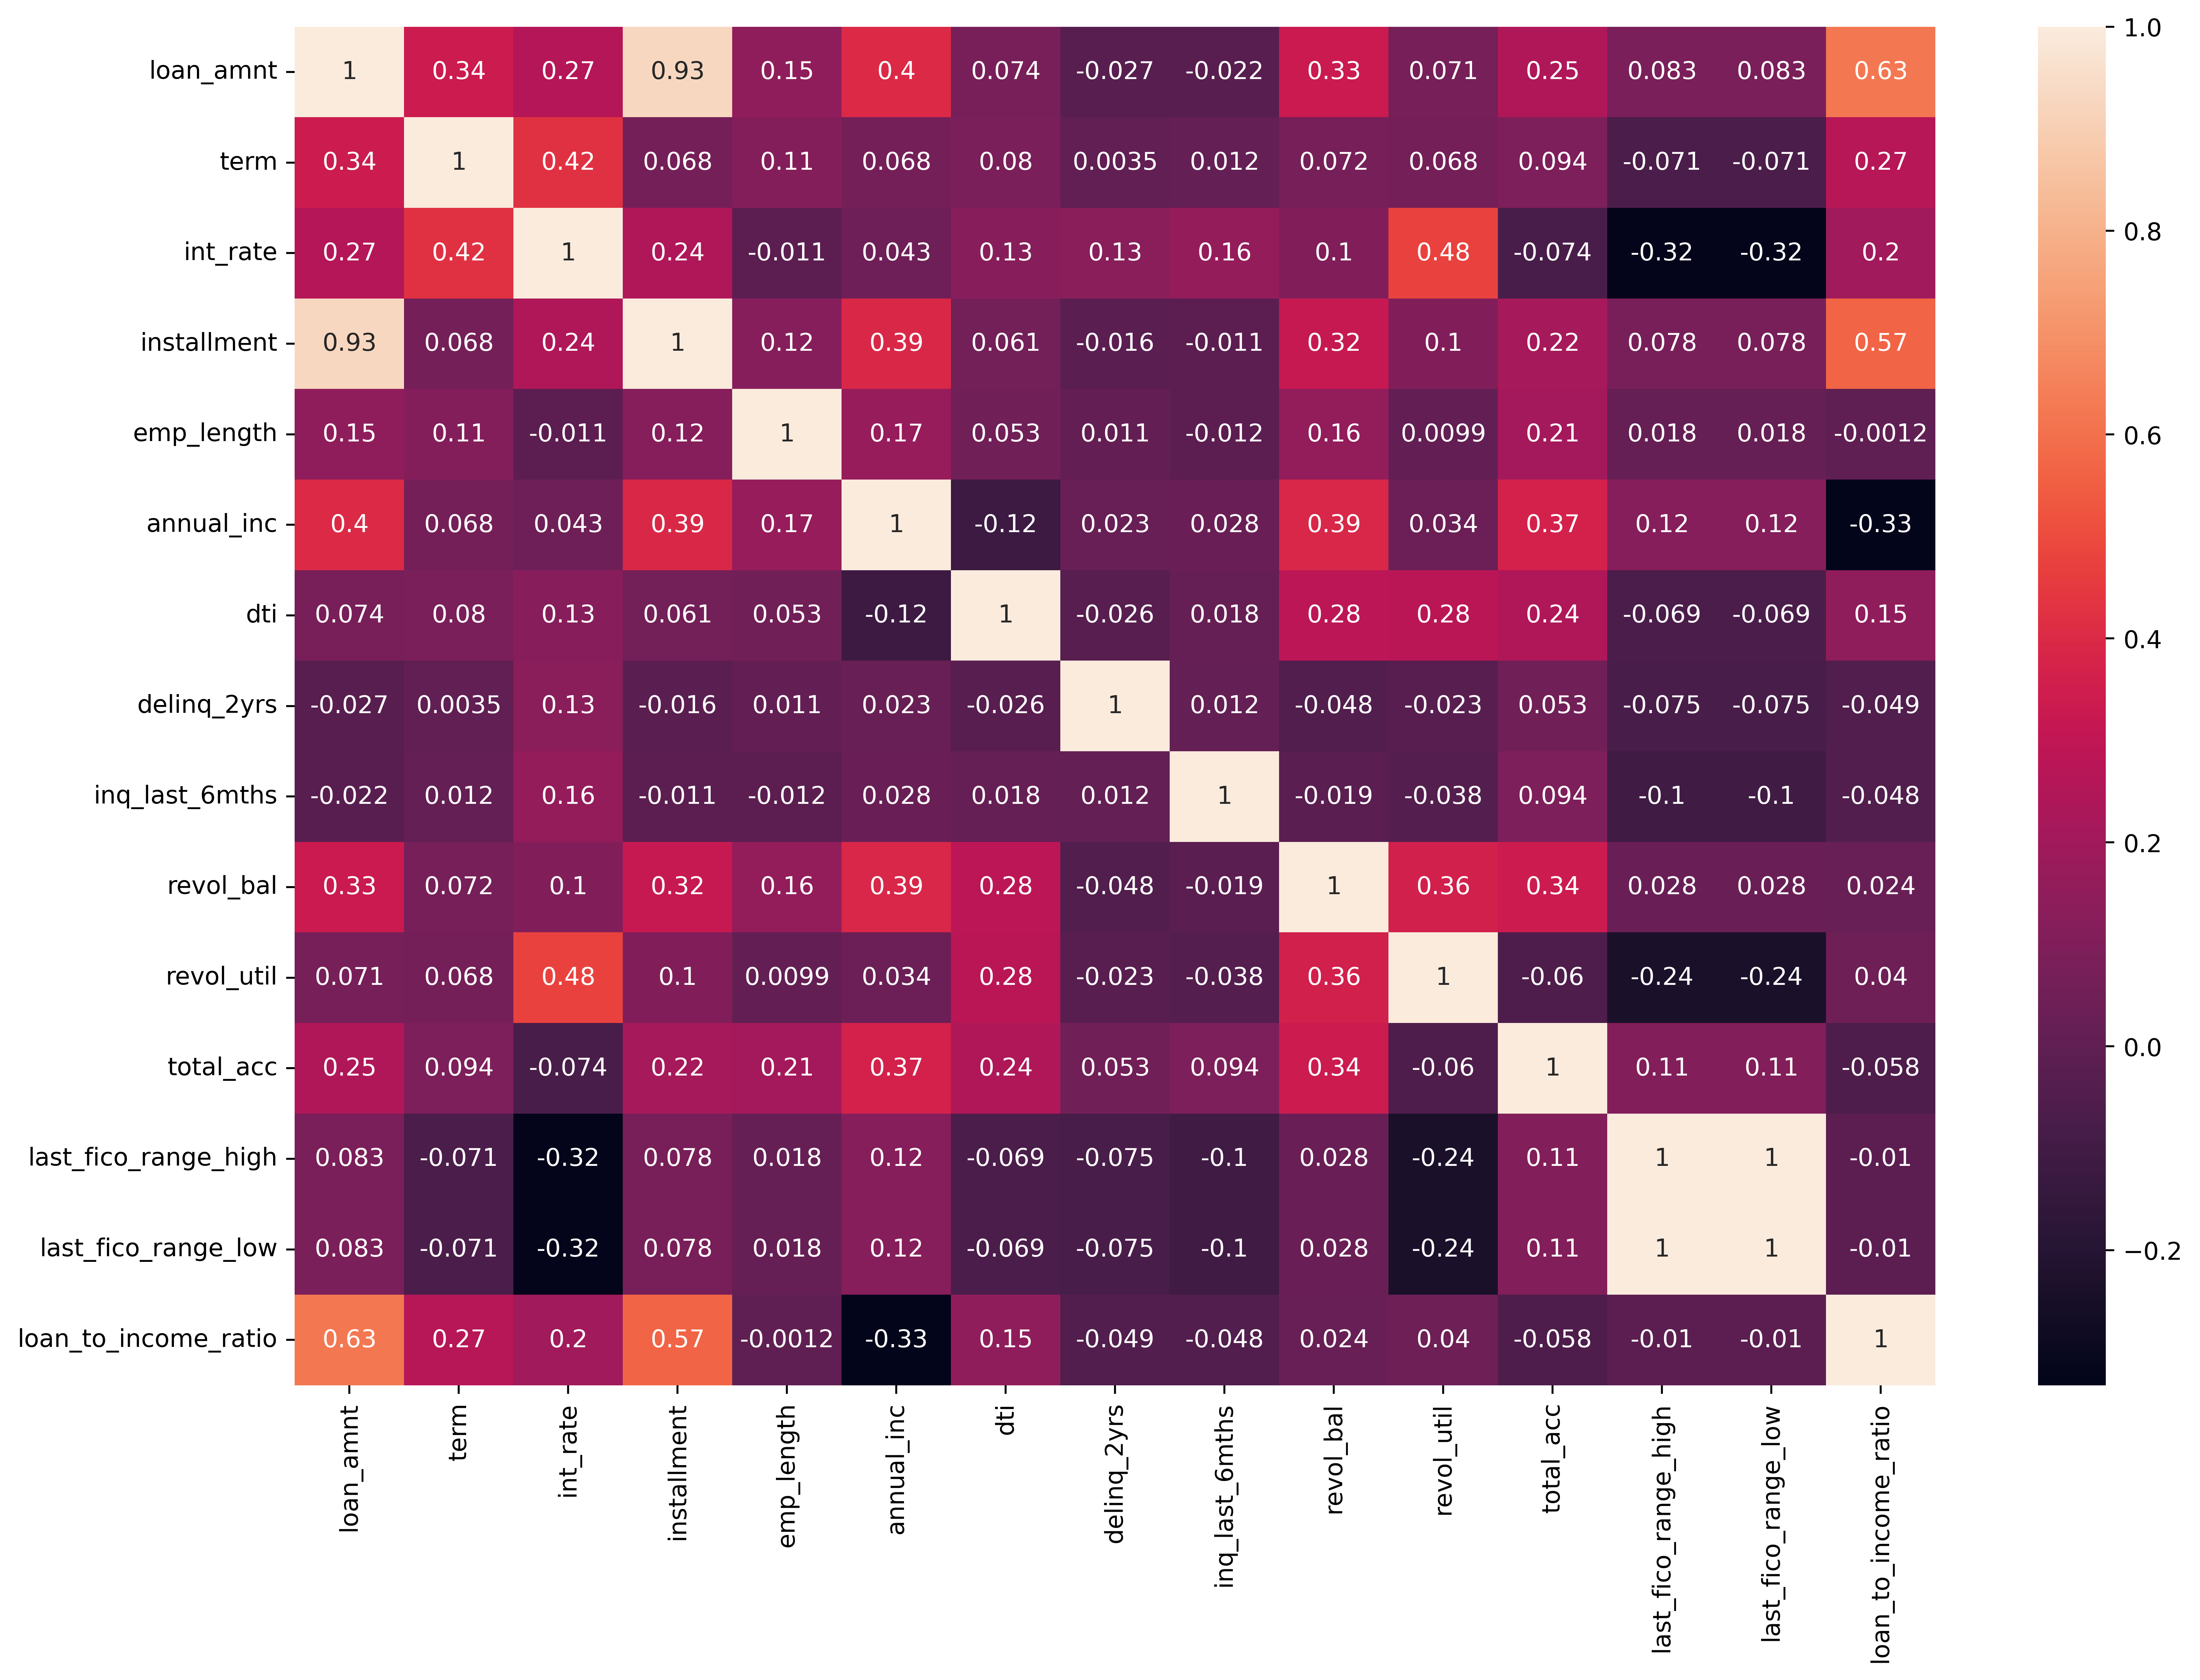

In [79]:
#sprawdzenie korelacji pomiędzy przeskalowanymi zmiennymi

plt.figure(figsize = (15,10), dpi=500)       
sns.heatmap(x_scaled_df.corr(), annot = True)

### Obserwacje i wnioski płynące z powyższej heatmapy:

#### 1. Wysokość udzielonej pożyczki koreluje w dużym stopniu z długośćia okresu kredytowania (0.34), saldem kredytu odnawialnego (0.33), co wysoce spodziewane- wysokością raty (0.93), rocznym dochodem (0.4) oraz, co również oczywiste- z wysokościa stosunku kwoty pożyczki do rocznego dochodu (0.63). W mniejszym stopniu wysokość pożyczki koreluje z historią zatrudnienia (0.15), wysokością oprocentowania (0.27) oraz całkowitą liczby kont kredytowych lub linii kredytowych (0.25)

#### 2. Długość okresu kredytowania silnie koreluje z oprocentowaniem (0.42) oraz ze współczynnikiem opisującym wysokość pozyczki do rocznych dochdów

#### 3. Oprocentowanie pożyczki silnie koreluje z wskaźnikiem wykorzystania linii kredytowej odnawialnej (0.48) oraz z rankingiem FICO (-0.32). W mniejszym stopniu z wysokością raty (0.24), współczynnikiem całkowietego obciążenia kredytowego dłużnika do dochodu (0.13), liczba przypadków opóźnienia powyżej 30 dni w spłacie należności w pliku kredytowym pożyczkobiorcy w ciągu ostatnich 2 lat (0.13) oraz stosunkowi kwoty udzielonej pożyczki do dochodu (0.2)

#### 4. Wysokość raty silnie koreluje ze współczynnikiem wysokości udzielonej pożyczki do dochodu (0.57), rocznym dochodem (0.39), całkowitym saldem odnawialnym (0.32) a także oprocentowaniem (0.24)

#### 5. Długość zatrudneinia namocniej z koreluje z całkowitą liczbą linii kredytowych pożyczkobiorcy (0.21), następnie z dochodem (0.17) oraz z saldem kredytu odnawialnego - wyższy dochód będący w korelacji z długością zatrudnienia zachęca do większego zadłużenia nominalnego

#### 6. Jak wspomniano powyżej - roczny dochód koreluje z całkowitym saldem kredytu odnawialnego oraz całkowitą liczbą linii kredytowych (kolejno 0.39 i 0.37)

#### 7. Co spodziewane - wartość współczynnika DTI (całkowite obciążenia kredytowe do dochodu) silnie koreluje z saldem kredytu odnawialnego, jego wykorzystaniem oraz całkowitą liczbą linii kredytowych (0.28, 0.28, 0.24)

#### 8. Całkowite saldo kredytu odnawialnego najsilniej koreluje z poziomem jego wykorzystania (0.36) oraz całkowitą liczbą otwartych linii kredytowych (0.34) 

#### 9. Wartość punkatcji FICO najsilniej koreluje z oprocentowaniem pożyczki oraz z wykorzystaniem salda kredytu odnawialnego (-0.32, -0.24). Oznacza to, że im wyższą punktację FICO uzyskuje pożyczkobiorca, tym niższe oprocentowanie jego pożyczki, a także wysoki wynik FICO będzie zależny od stopnia wykorzystania całkowitego odnawialnego salda kredytowego

In [80]:
#analiza głównych składowych (PCA) dla przeskalowanych danych
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(x_scaled)

PCA(random_state=42)

In [81]:
#pobranie współczynników dla pierwszego składnika głównego
pca.components_[0]

array([ 0.50974193,  0.23607792,  0.26347498,  0.47768912,  0.14221014,
        0.24769745,  0.16001415, -0.0015174 ,  0.01605078,  0.31832838,
        0.18879494,  0.22098509, -0.01759435, -0.01759517,  0.30488057])

In [82]:
#wyjaśniona wariancja dla każdego składnika głównego
pca.explained_variance_ratio_

array([2.08672157e-01, 1.67428637e-01, 1.14931076e-01, 8.74523210e-02,
       7.34074645e-02, 7.16559377e-02, 6.67155668e-02, 6.47136853e-02,
       5.28970557e-02, 3.37634890e-02, 2.97787648e-02, 1.99665233e-02,
       6.86790176e-03, 1.74941863e-03, 1.24312456e-09])

In [83]:
#skumulowana wyjaśniona wariancja
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.20867216, 0.37610079, 0.49103187, 0.57848419, 0.65189166,
       0.72354759, 0.79026316, 0.85497685, 0.9078739 , 0.94163739,
       0.97141616, 0.99138268, 0.99825058, 1.        , 1.        ])

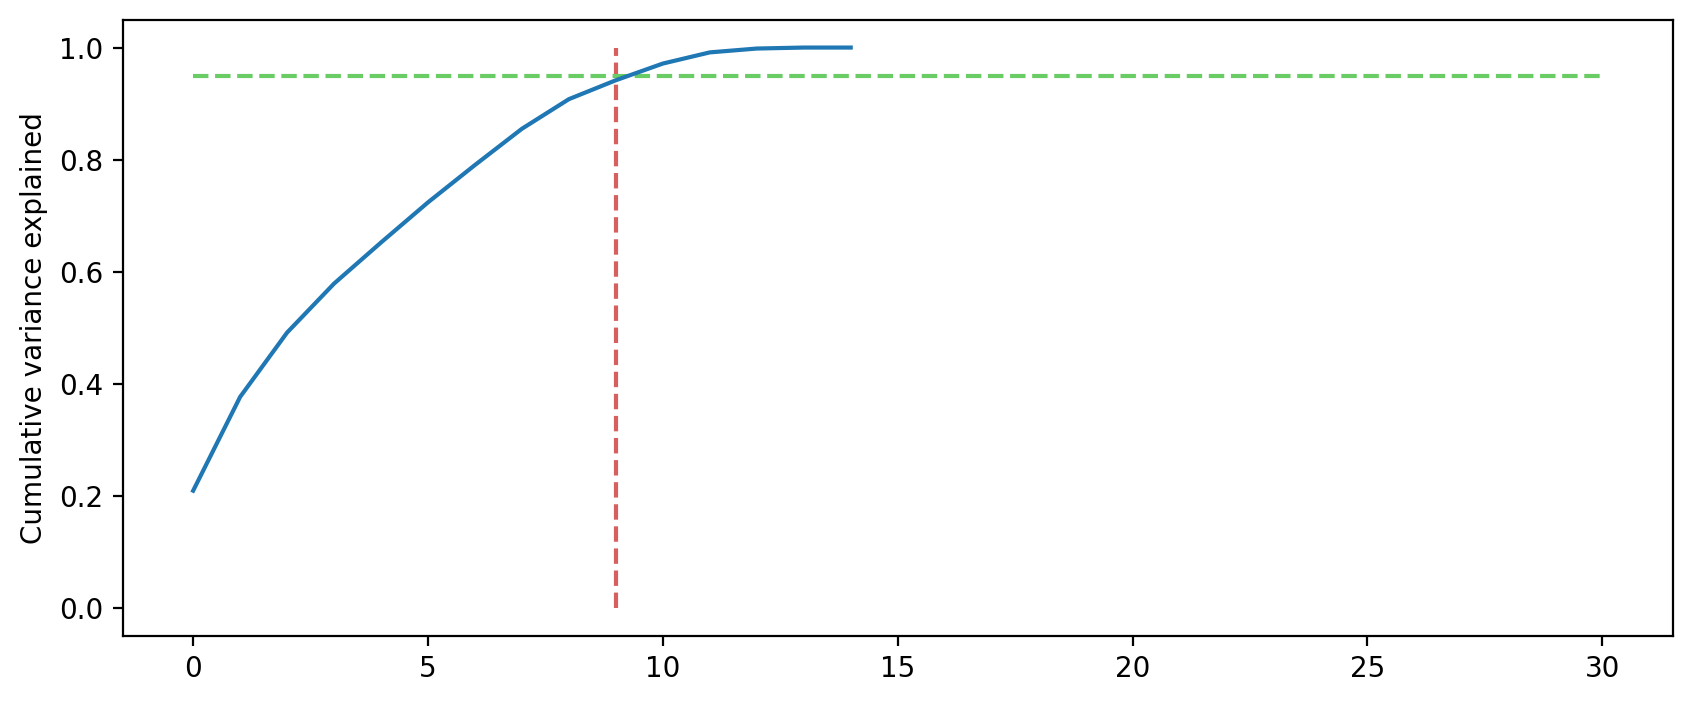

In [84]:
#wykres skumulowanej wyjaśnionej wariancji

fig = plt.figure(figsize=[10,4],dpi=200)
plt.vlines(x=9, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Wniosek: Przyjęto liczbę głównych skłądowych równą 9. Ilość ta w wystarczający sposób objaśnia wariancję. Powyżej tej liczby wzrost wypłaszcza się nie odnotowując większej dynamiki wzrostu

In [85]:
#Analiza głównych składowych (PCA) przy użyciu metody przyrostowej (IncrementalPCA)
    
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=9)
x_pca_final = pca_final.fit_transform(x_scaled)

In [86]:
print(x.shape)
print(x_pca_final.shape)

(37621, 15)
(37621, 9)


<AxesSubplot:>

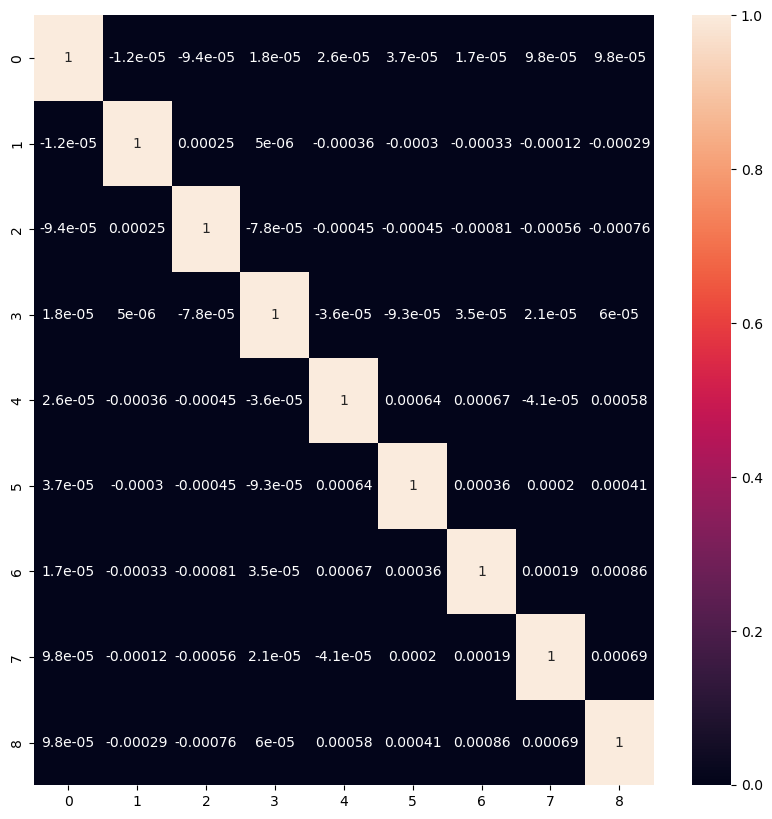

In [87]:
#obliczanie macierzy korelacji dla składników głównych PCA
corrmat = np.corrcoef(x_pca_final.transpose())

plt.figure(figsize=(10,10))
sns.heatmap(corrmat, annot=True)

#### korelacja pomiędzy zmiennymi jest znikoma - na tym etapie zmienne powinnny być niezależne od siebie

In [88]:
#utworzenie data frame z komponentami głównymi PCA
colnames = list(x.columns)

pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df

PC1       PC2               Feature
0   0.509742 -0.110442             loan_amnt
1   0.236078  0.123906                  term
2   0.263475  0.361324              int_rate
3   0.477689 -0.118483           installment
4   0.142210 -0.076559            emp_length
5   0.247697 -0.209955            annual_inc
6   0.160014  0.110962                   dti
7  -0.001517  0.074716           delinq_2yrs
8   0.016051  0.099046        inq_last_6mths
9   0.318328 -0.055485             revol_bal
10  0.188795  0.291619            revol_util
11  0.220985 -0.185620             total_acc
12 -0.017594 -0.558954  last_fico_range_high
13 -0.017595 -0.558954   last_fico_range_low
14  0.304881  0.052678  loan_to_income_ratio

#### Powyższa tabela przedstawia w jakim stopniu z poszczególnych skłądowych zbudowana są zmienne 

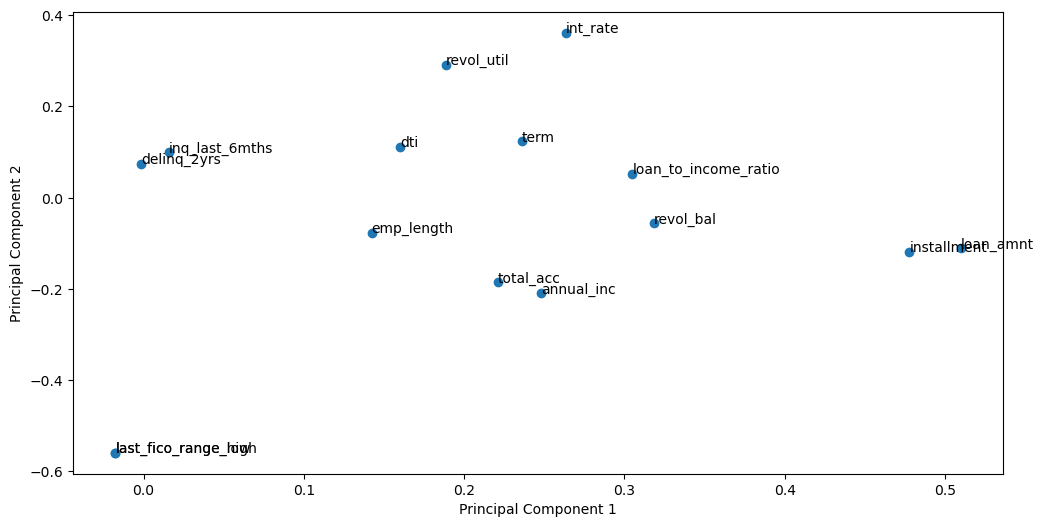

In [89]:
#wizualizacja składników głównych PCA
fig = plt.figure(figsize = (12,6))

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))

plt.show()

#### wizualizacja pozwala zrozumieć jak grupują się zmienne

#### Klasteryzacja

In [90]:
#Pobranie bibliotek potrzebnych dla algorytmu klasteryzacji KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [91]:
kmeans = KMeans(n_clusters=4, max_iter=1000)
kmeans.fit(x_pca_final)

KMeans(max_iter=1000, n_clusters=4)

In [92]:
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 1])

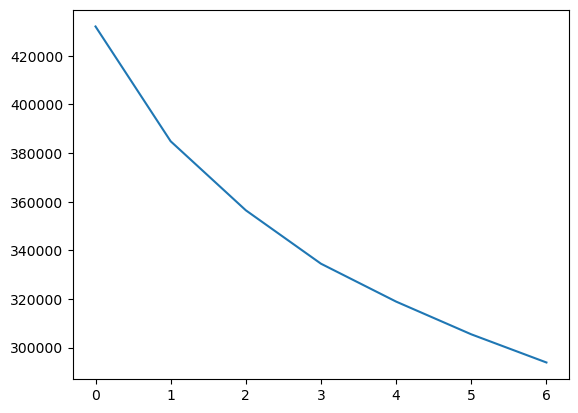

In [93]:
#metoda łokcia - elbow-curve
ssd = [] 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(x_pca_final)
    
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

In [94]:
#miara wewnętrzna - wskaźnik sylwetkowy

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    #intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(x_pca_final)
    
    cluster_labels = kmeans.labels_
    
    #silhouette score
    silhouette_avg = silhouette_score(x_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.1677622961006178
For n_clusters=3, the silhouette score is 0.13363044298554919
For n_clusters=4, the silhouette score is 0.1445066053218038
For n_clusters=5, the silhouette score is 0.14046979419920416
For n_clusters=6, the silhouette score is 0.13752694199055884
For n_clusters=7, the silhouette score is 0.11562252006789302
For n_clusters=8, the silhouette score is 0.11396965230941615


#### Wnioski: stosując metodę łokcia i silhouette określono liczbę klastrów na 4

### Klasteryzacja - KMeans

In [95]:
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(x_pca_final)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [96]:
kmeans.labels_

array([1, 1, 1, ..., 0, 3, 1])

In [97]:
#dodanie do data frame podannego operacji usunięcia outliersów kolumny'K-Means_Cluster_ID',
#która zawierać będzie etykiety klastrów przypisane do każdego punktu danych. 
#Każdy punkt danych zostaje przyporządkowany do jednego z klastrów w wyniku działania algorytmu K-means

dat_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

C:\Users\sebastian.podsiadlo\AppData\Local\Temp\ipykernel_15584\524934763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_


In [98]:
dat_outliers_removed.head(10)

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0      5000.0  36.0     10.65       162.87     B        B2        10.0   
2      2400.0  36.0     15.96        84.33     C        C5        10.0   
3     10000.0  36.0     13.49       339.31     C        C1        10.0   
4      3000.0  60.0     12.69        67.79     B        B5         1.0   
5      5000.0  36.0      7.90       156.46     A        A4         3.0   
6      7000.0  60.0     15.96       170.08     C        C5         8.0   
7      3000.0  36.0     18.64       109.43     E        E1         9.0   
9      5375.0  60.0     12.69       121.45     B        B5         0.0   
10     6500.0  60.0     14.65       153.45     C        C3         5.0   
11    12000.0  36.0     12.69       402.54     B        B5        10.0   

    annual_inc  desc addr_state  ...  desc_classification  avg_inc_by_state  \
0      24000.0    78         AZ  ...                Short           67800.0   
2      12252.0     0         IL  ...                Short           69790.0   
3      49200.0   180         CA  ...             Detailed           72221.0   
4      80000.0   306         OR  ...             Detailed           57726.0   
5      36000.0     0         AZ  ...                Short           67800.0   
6      47004.0   279         NC  ...             Detailed           64317.0   
7      48000.0    57         CA  ...                Short           72221.0   
9      15000.0   473         TX  ...             Detailed           73837.0   
10     72000.0   253         AZ  ...             Detailed           67800.0   
11     75000.0     0         CA  ...                Short           72221.0   

    avg_loan_by_state  prof_rank  avg_inc_by_rank  avg_loan_by_prof_rank  \
0             10889.0     senior          80544.0                12708.0   
2             11381.0     senior          80544.0                12708.0   
3             11284.0     senior          80544.0                12708.0   
4             10591.0      entry          62052.0                 9857.0   
5             10889.0     junior          65834.0                10721.0   
6             11266.0     senior          80544.0                12708.0   
7             11284.0     senior          80544.0                12708.0   
9             11582.0      entry          62052.0                 9857.0   
10            10889.0     junior          65834.0                10721.0   
11            11284.0     senior          80544.0                12708.0   

    avg_int_rate_by_term  avg_annual_inc_by_loan_sts  \
0                  11.23                     70160.0   
2                  11.23                     70160.0   
3                  11.23                     70160.0   
4                  14.86                     70160.0   
5                  11.23                     70160.0   
6                  14.86                     70160.0   
7                  11.23                     70160.0   
9                  14.86                     63386.0   
10                 14.86                     70160.0   
11                 11.23                     70160.0   

    avg_emp_length_by_loan_sts  K-Means_Cluster_ID  
0                          4.9                   1  
2                          4.9                   1  
3                          4.9                   1  
4                          4.9                   1  
5                          4.9                   1  
6                          4.9                   1  
7                          4.9                   1  
9                          5.0                   1  
10                         4.9                   3  
11                         4.9                   2  

[10 rows x 49 columns]

#### Przedstawienie na wykresach typu boxplot rozkładów zmiennych w poszczególnych klastrach 

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='loan_amnt'>

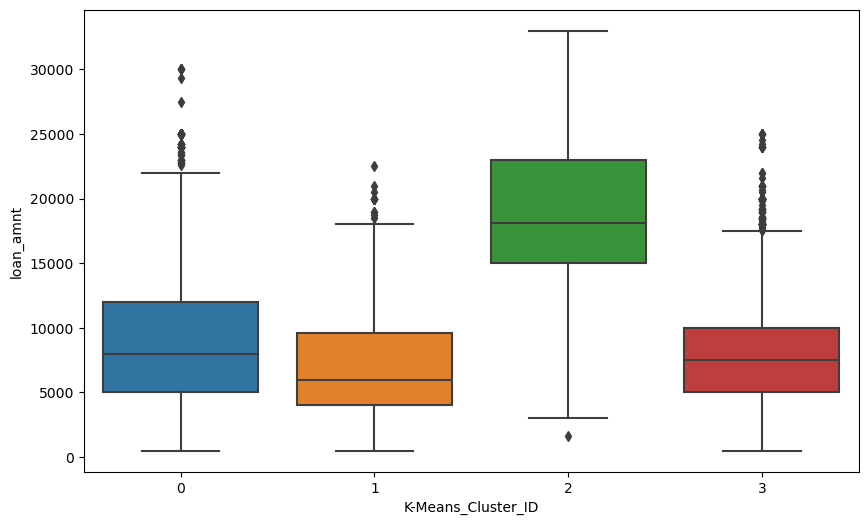

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=dat_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='annual_inc'>

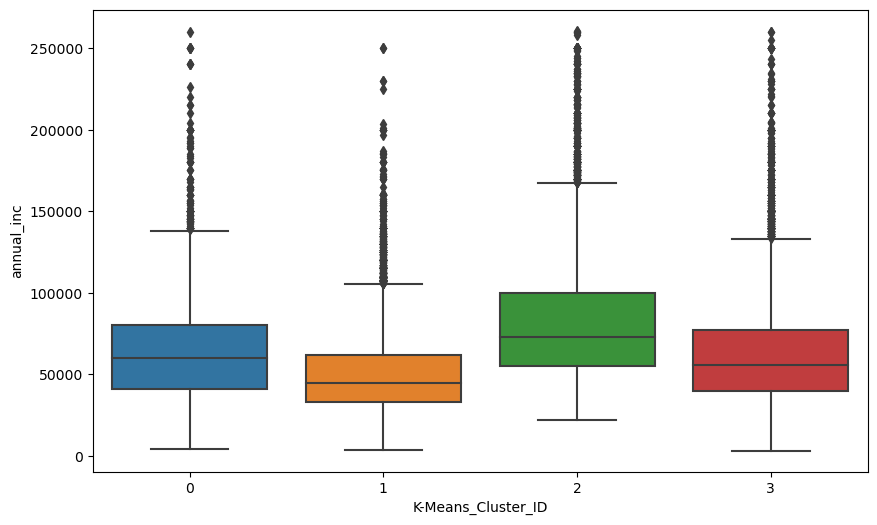

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=dat_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='dti'>

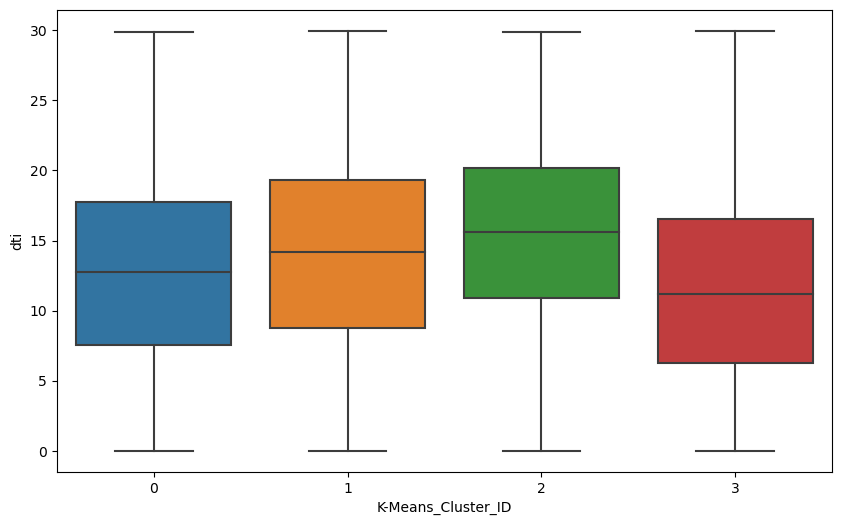

In [101]:
plt.figure(figsize=(10,6))
sns.boxplot(x='K-Means_Cluster_ID', y='dti', data=dat_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='last_fico_range_high'>

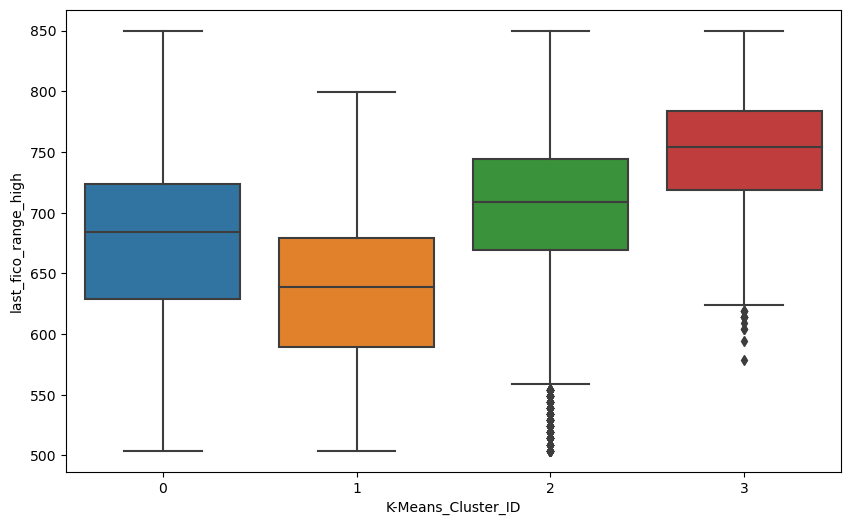

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(x='K-Means_Cluster_ID', y='last_fico_range_high', data=dat_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='revol_bal'>

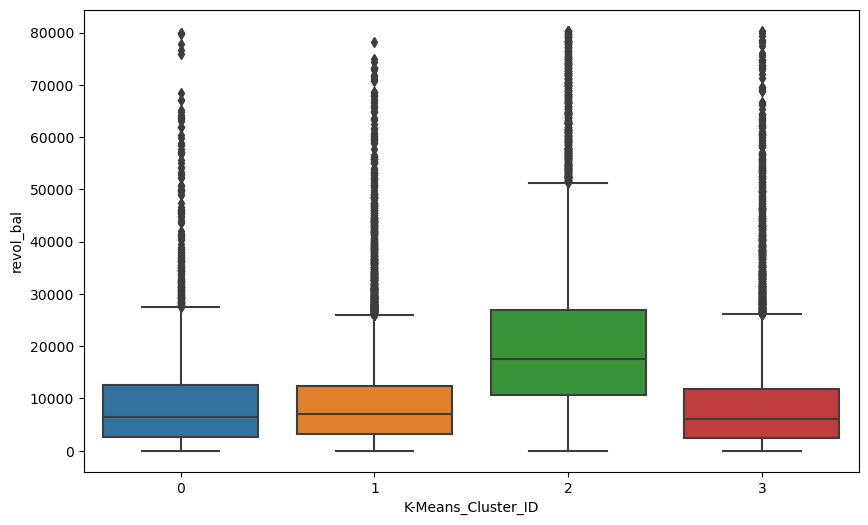

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(x='K-Means_Cluster_ID', y='revol_bal', data=dat_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='int_rate'>

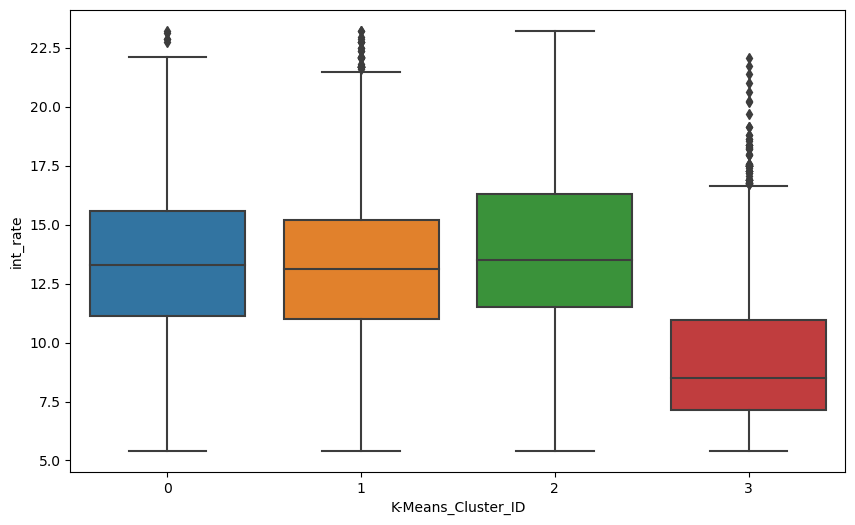

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(x='K-Means_Cluster_ID', y='int_rate', data=dat_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='installment'>

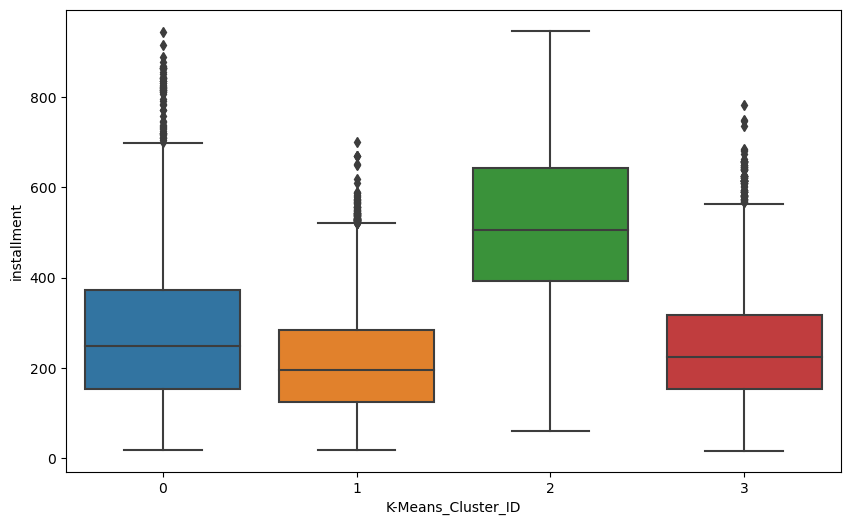

In [105]:
plt.figure(figsize=(10,6))
sns.boxplot(x='K-Means_Cluster_ID', y='installment', data=dat_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='emp_length'>

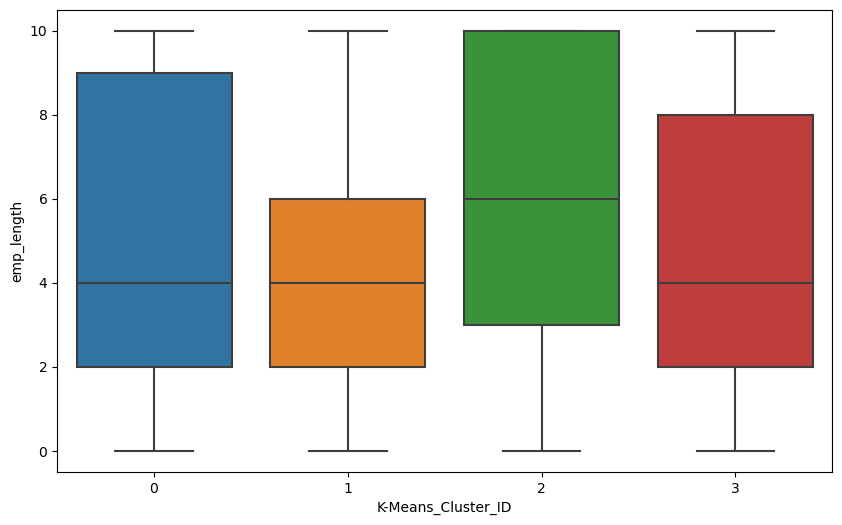

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(x='K-Means_Cluster_ID', y='emp_length', data=dat_outliers_removed)

### Klasteryzacja - metoda hierarchiczna

In [107]:
from scipy.cluster.hierarchy import linkage, dendrogram
x_scaled_df.head()

loan_amnt      term  int_rate  installment  emp_length  annual_inc  \
0  -0.837108 -0.574926 -0.345507    -0.767653    1.462513   -1.161184   
1  -1.231809 -0.574926  1.117285    -1.185412    1.462513   -1.501529   
2  -0.078068 -0.574926  0.436853     0.170842    1.462513   -0.431128   
3  -1.140724  1.739356  0.216470    -1.273390   -1.104080    0.461162   
4  -0.837108 -0.574926 -1.103073    -0.801748   -0.533726   -0.813538   

        dti  delinq_2yrs  inq_last_6mths  revol_bal  revol_util  total_acc  \
0  2.123769    -0.308225        0.045545   0.113170    1.225043  -1.150718   
1 -0.696953    -0.308225        0.903554  -0.740710    1.747766  -1.058050   
2  0.983858    -0.308225        0.045545  -0.529716   -0.989463   1.443992   
3  0.676901    -0.308225       -0.812464   1.242014    0.172535   1.536660   
4 -0.327413    -0.308225        1.761563  -0.340843   -0.731634  -0.872713   

   last_fico_range_high  last_fico_range_low  loan_to_income_ratio  
0              0.582166             0.582173              0.227043  
1              0.582166             0.582173              0.112835  
2             -1.207168            -1.207172              0.180419  
3             -0.146822            -0.146820             -1.340458  
4             -1.737342            -1.737349             -0.410152

In [108]:
#single linkage
sl_mergings = linkage(x_scaled_df, method="single", metric='euclidean')

#dendrogram(sl_mergings)
#plt.show()

In [109]:
#complete linkage
cl_mergings = linkage(x_scaled_df, method="complete", metric='euclidean')

#dendrogram(cl_mergings)
#plt.show()

#polecenia generowania wykresów są zamarkowane, ponieważ przerastało to możliwości mojego komputera

In [110]:
#4 klastry z single linkge
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
#4 klastry z complete linkage
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
dat_outliers_removed["Hierarchical_Cluster_labels"] = cl_cluster_labels

C:\Users\sebastian.podsiadlo\AppData\Local\Temp\ipykernel_15584\3963705122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_outliers_removed["Hierarchical_Cluster_labels"] = cl_cluster_labels


#### Przedstawienie na wykresach typu boxplot rozkładów zmiennych w poszczególnych klastrach

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='loan_amnt'>

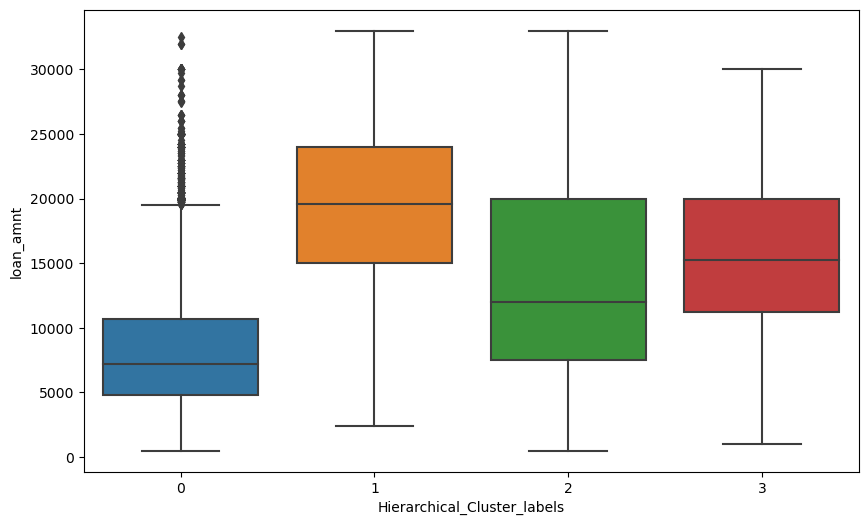

In [113]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hierarchical_Cluster_labels', y='loan_amnt', data=dat_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='annual_inc'>

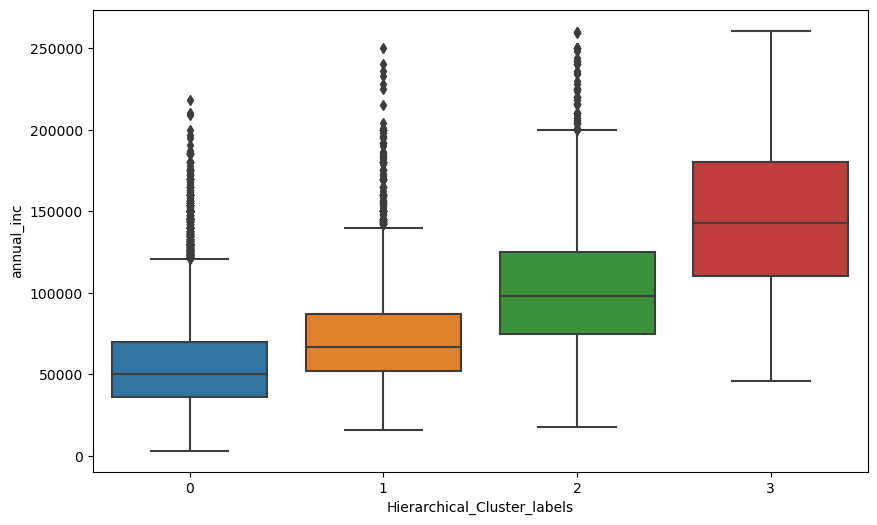

In [114]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hierarchical_Cluster_labels', y='annual_inc', data=dat_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='dti'>

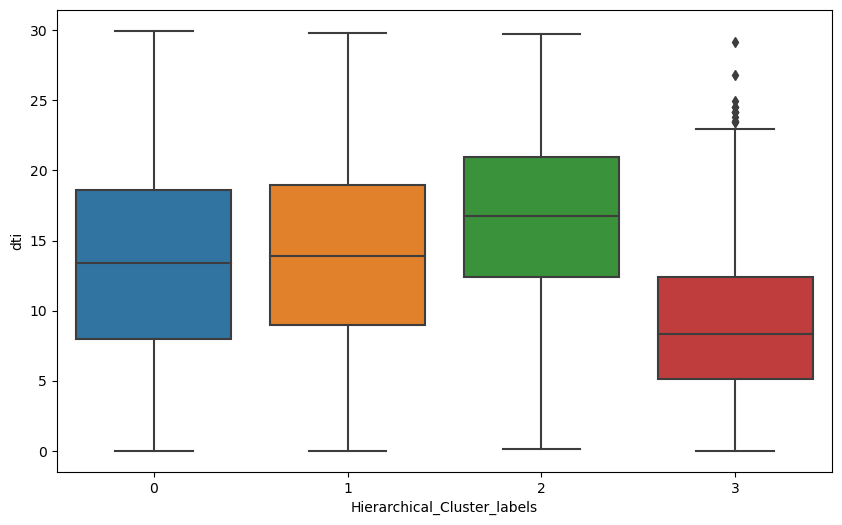

In [115]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hierarchical_Cluster_labels', y='dti', data=dat_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='last_fico_range_high'>

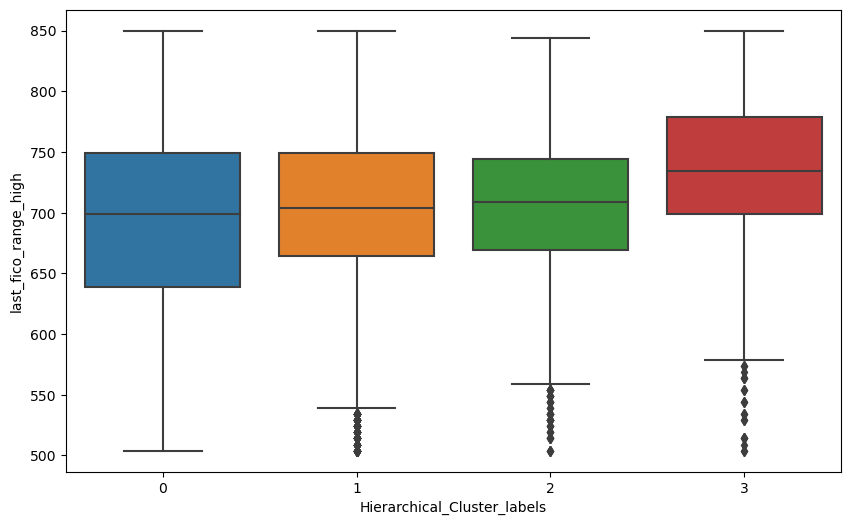

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hierarchical_Cluster_labels', y='last_fico_range_high', data=dat_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='revol_bal'>

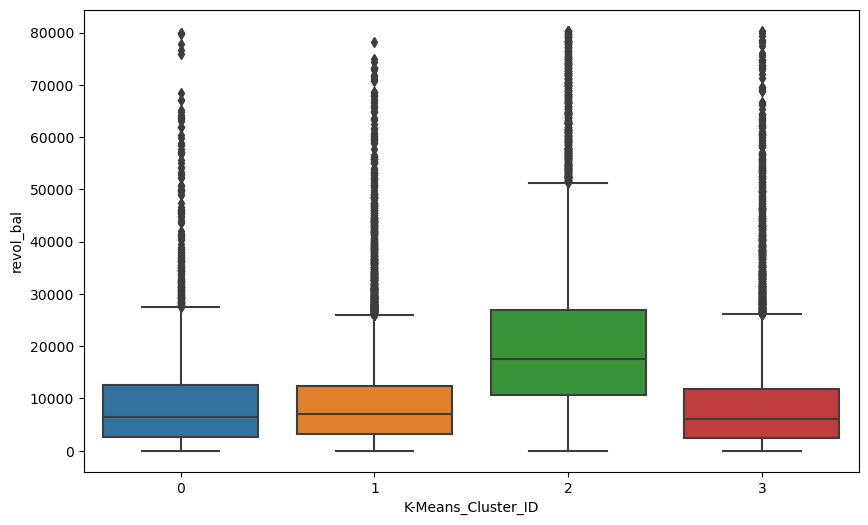

In [117]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hierarchical_Cluster_labels', y='revol_bal', data=dat_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='revol_util'>

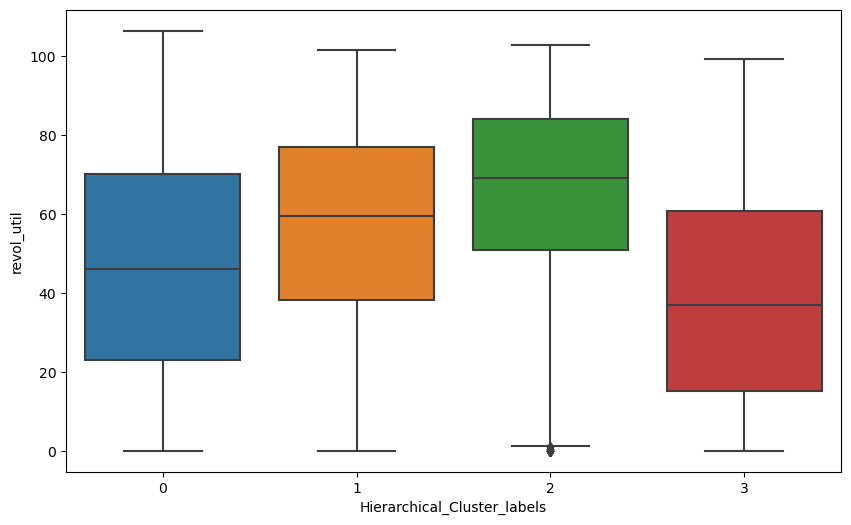

In [118]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hierarchical_Cluster_labels', y='revol_util', data=dat_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='int_rate'>

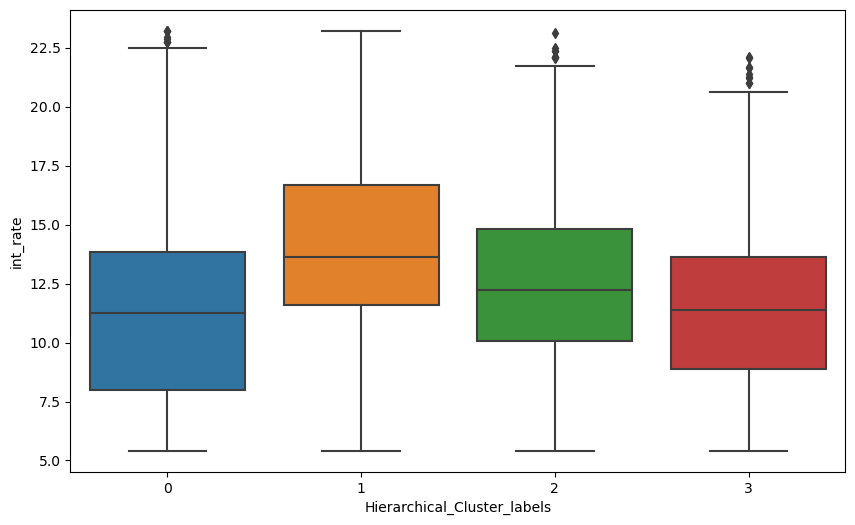

In [119]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hierarchical_Cluster_labels', y='int_rate', data=dat_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='installment'>

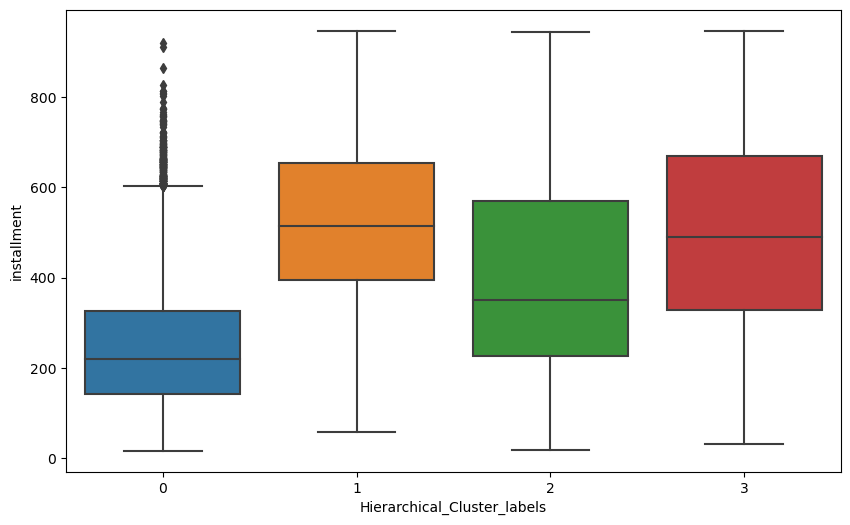

In [120]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hierarchical_Cluster_labels', y='installment', data=dat_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='emp_length'>

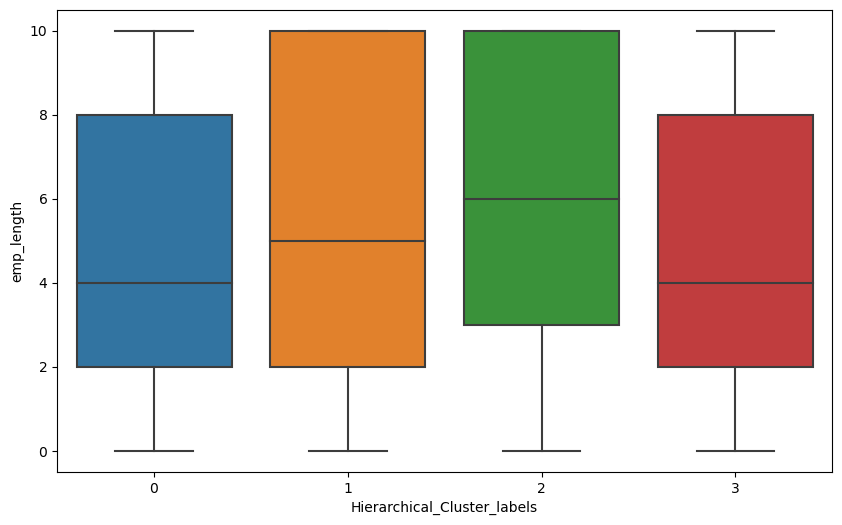

In [121]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hierarchical_Cluster_labels', y='emp_length', data=dat_outliers_removed)

In [124]:
x_pca_final_df = pd.DataFrame(x_pca_final,columns=['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

In [125]:
x_pca_final_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.696642 -0.258548 -0.025826  2.741909  0.691135 -0.331246 -0.463406   
1 -1.422606 -0.905369  0.427711  1.019636  0.643993  1.231311  0.074969   
2  0.342964 -0.984276 -0.646851 -0.369369  0.950959 -2.272145 -0.474108   
3 -0.305878 -0.318380 -2.006629  1.027922  0.829456  0.918322 -0.343612   
4 -2.041114 -1.925883 -0.129168 -1.001784 -0.159723 -1.616899  1.269275   

        PC8       PC9  
0 -0.146754  1.876104  
1 -0.813781  2.774955  
2 -0.179591  0.240296  
3 -0.564651 -2.582918  
4 -0.297702  0.051789

In [126]:
x_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
x_pca_final_df['Hierarchical_Cluster_Labels'] = cl_cluster_labels